<a ><img src="https://cdn.tuinvest.de/assets/logos/TUInvest_Logo-353d42494757660b8381a31c9f99a6ca.png"  width="200" align="left"> </a>
<div style="text-align: right"> <h3><span style="color:gray"> INTERNAL USE ONLY </span> </h3> </div>

<br>
<br>
<br>

<a ><img src="Pictures/QSeries.png" Width="300" align="center"> </a>

<br>
<br>



<h1><center>AlgoTrading 101 — A hands-on Introduction</center></h1>
<h2><center> <span style="font-weight:normal"><font color='#022F73'> Lecture 1: Data Collection, Preparation and Manipulation </font>  </span></center></h2>


<h3><center><font color='gray'>JONAS GOTTAL</font></center></h3>


<h4>About this Notebook</h4>
The Objective of this Lecture is a comprehensible hands-on Introduction to Algo Trading <br>
for the members of TU Invest, to raise curiosity and resurrect Alternative Strategies/Assets.

Although the material used is not fit to  *understand*  for beginners, with easier strategies <br>
there won't be a profitable among them. Thus the mathematics statistics behind the following  <br>
stratgies might be hard to understand but not to implement. And I hope this will lead some  <br>
curious minds to further study the concepts more thoroughly. <br>
<br>

<span style="color:gray"> *To limit our time spent per section, basics in Python and Statistics are welcomed. <br> If not, there will be links to a <a href="#16"> Backup Section</a> with additional code and explanations.* </span>
<br>
<br> 

---
---
<div style="text-align: center"> <h3><span style="color:red"> WORKING DRAFT</span> </h3> </div>

---
---


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="text-decoration:none; margin-top: 30px; background-color:#F2F2F2; border-color:#022F73">
    <span style="color:#022F73">
    <ol>
      <li><a href="#1"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Intro  </span> </a></li>
          <ol>
      <li><a href="#2"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >A comprehensive Overview  </span> </a></li>
      <li><a href="#3"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Definition of AlgoTrading  </span> </a></li>
      <li><a href="#4"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Benefits of an algorithmic approach</span> </a></li>
      <li><a href="#5"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Our Focus and Scope</span> </a></li>
        </ol>
      <li><a href="#6"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Raw Data </span> </a></li>
       <ol>
       <li><a href="#7"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Provider and APIs </span> </a></li>
       <li><a href="#8"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Let's limit our universe: What Markets and Instruments are fit for the start </span> </a></li>
       <li><a href="#9"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Data Snooping: p-Hacking, SVD and PCA </span> </a></li>
       </ol>   
       <li><a href="#10"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Preferred Statistical Characteristics of Data</span> </a></li>
       <ol>
       <li><a href="#11"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Skewness and Kurtosis</span> </a></li>
       <li><a href="#12"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Stationarity </span> </a></li>    
       <li><a href="#13"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Integration</span> </a></li>
       <li><a href="#14"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Cointegration </span> </a></li> 
       </ol>   
       <li><a href="#15"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Todays Objective: processed dataset for our next lecture</span> </a></li>
        <li><a href="#16"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >APPENDIX</span> </a></li>
        <ol> 
        <li><a href="#17"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Statistics 101</span> </a></li>
       <li><a href="#18"> <span style="color:#022F73;text-decoration:underline;text-decoration-color:#F2F2F2" 
       >Python 101</span> </a></li> 
        </ol>
    </ol>
    </span>
</div>

In [1]:
import numpy as np
import pandas as pd
import dtale
import matplotlib.pyplot as plt
import seaborn as sns
import backtester
import statsmodels as sm
from statsmodels.tsa.stattools import coint, adfuller
from scipy import stats

# 1. Intro <a id="1"></a>

## A. A Comprehensive Overview <a id="2"></a>

<a ><img src="Pictures/org.png" Width="600" align="center"> </a>

#### Technical based on Endogenous Factors and Quant Strategies mostly additional on Exogenous Indicators:

Are these factors Endogenous or Exogenous?



<span style="color:red"> Exogenous </span>: An unanticipated change in consumer tastes for your product

<span style="color:red"> Exogenous </span>: The U.S. Federal Reserve changes the cost of borrowing

<span style="color:red"> Exogenous </span>: A competitor has major safety issues with their products

<span style="color:red"> Exogenous </span>: The price of critical components for making phones and computers suddenly changes 

<span style="color:blue"> Endogenous </span>: Quarterly earnings announcements 

<span style="color:red"> Exogenous </span>: Shipping times from overseas grow due to new ocean weather patterns

<span style="color:blue"> Endogenous </span>: Trading volume matched with price to track Volume-Weighted Average Price

<span style="color:red"> Exogenous </span>: CEO is replaced unexpectedly

<span style="color:blue"> Endogenous </span>: Trends in stock prices measured by momentum

#### Quant Strategy:  HFT vs. StatArb

High Frequency Trading exploits millisecond and sub-millisecond
market microstructure inefficiencies.
* Focuses on infrastructure flaws (uneven playing field) rather than longer term predictions of asset prices
* Models behavior patterns of major players in a market
* Seeks to uncover large orders hidden by stealth execution strategies

Examples of High Frequency Trading Strategies
* An investment fund wants to purchase a large block of stock.
* Uses stealth execution strategy to mask the order but not perfectly.
* Other market players detect the strategy and "jump ahead" of the order with their own buy orders
* Spoofing "fake" orders

Stat Arb
* Create a set of rules to generate trade orders and manage position risk with minimal intervention
* Identify statistically significant and repeatable market behavior and exploit it to generate profits.
* Can be low-frequency (weekly, daily) to high-frequency (seconds, milliseconds,...)

Quant Trading Challenges
Trading is Competitive
* Market is about 80% quant already
* Strategies optimal for assumptions only
* With risk there is no guarantee of a profit
* Markets change (regimes, correlations. volatility...)

### Statistical arbitrage or StatArb:
1. trading signals are systematic, or rules-based, as opposed to driven by fundamentals, 
2. the trading book is market-neutral2, in the sense that it has zero beta with the market, and 
3. the mechanism for generating ex- cess returns is statistical” (Avellaneda and Lee, 2010, p. 761). 

*Additional*
+ large numbers of securities 
+ very short holding periods 
+ substantial computational, trading, and information technology (IT) infrastructure

Typical approaches range from plain vanilla pairs trading to sophisticated, nonlinear models from the domains of machine learning, physics and mathematics.
Krauss (2015) provides a recent review of more than 90 statistical arbitrage pairs trading strategies, focusing on relative mispricings between two and more securities. [Krauss, C. (2015). Statistical arbitrage pairs trading strategies: Review and outlook. IWQW Discussion Paper Series, University of Erlangen-Nürnberg.]


In contrast, classical financial research is primarily focused on identifying capital market anomalies with high explanatory value. [Jacobs, H. (2015). What explains the dynamics of 100 anomalies? Journal of Banking & Finance, 57:65–85.] provide explanations for capital market anomalies 
The Journal of Finance, one of the leading academic journals in that field produces 17 references for a search for ”neural networks”.



#### Market participants
1. Retail investors: The average person. He or she may be buying BTC because a friend recommended it, or selling mined BTC to get some cash. 
1. Institutional Investors: Organizations or high net-worth individuals who trade large quantities. They can be responsible for big market movements.
1. Professional Human Traders: These people are actively trying to beat the market. They may make trades based on news, some combination of technical analysis indicators, or gut feeling.
1. Algorithms: Trading algorithms receive market data, make decisions, and place orders automatically.

### History
#### Use of Al and ML in Algorithmic Trading 

* 1982 James Simons starts quant investment firm Renaissance Technologies
* 1987 Black Monday 22% one-day crash in S&P 500 caused by automated "program trading"
* 1988 David Shaw founds D.E. Shaw and is an early adopter of Al among its hedge funds
* 2010 Flash Crash occurs on May 6. In 36 minutes. the S&P crashed 8%, before a rebound
* 2012 Knight Capital loses \\$440 million in 45 minutes after deploying unverified trading software
* 2017 Two Sigma hedge fund which uses ML. crosses the \\$50 billion in assets under management
* 2018 Renaissance Technologies. citing reduced profitability, reduces the use of pattern-based strategies for futures trading in its Renaissance Institutional Diversified Alpha (RIDA) fund by more than 60%

## B. Definition of AlgoTrading <a id="3"></a>

---
<font color='black'>The term goes back to the universal scholar **Abu Dschaʿfar Muhammad ibn Musa al-Chwarizmi**, Latinized as *Algorismi*, a mathematician, astronomer and geographer during the Abbasid heyday around 800 AD, who lived in Baghdad in the "House of wisdom”. Alchwarizmi revolutionized mathematics in the western world with a book on the Indian number system and arithmetic rules such as addition, subtraction, multiplication, division, fractions, and the extraction of roots. However, some well-known algorithms are much older, as the sieve of Eratosthenes, the Euclidean algorithm and Gaussian elimination were already described over two thousand years ago.
</font>
--- 

## C. Benefits of an algorithmic Approach <a id="4"></a>

<font color='black'>The rate of failure in quantitative finance is high, particularly so in financial ML. The few who succeed amass a large amount of assets and deliver consistently exceptional performance to their investors. However, that is a rare outcome, for reasons explained in this book. Over the past two decades, I have seen many faces come and go, firms started and shut down. In my experience, there is one critical mistake that underlies all those failures.

1. **The Sisyphus Paradigm:** 
Discretionary portfolio managers (PMs) make investment decisions that do not fol- low a particular theory or rationale (if there were one, they would be systematic PMs).
Because nobody fully understands the logic behind their bets, investment firms ask them to work independently from one another.


2. **The Meta-Strategy Paradigm:** 
If you have been asked to develop ML strategies on your own, the odds are stacked against you. It takes almost as much effort to produce one true investment strategy as to produce a hundred, and the complexities are overwhelming: data curation and processing, HPC infrastructure, software development, feature analysis, execution simulators, backtesting, etc. As in a *Production Chain*:

    1. Data Curators
    collecting, cleaning, indexing, storing, adjusting, and delivering all data   
    1. Feature Analysts
    transforming raw data into informative signals.    
    1.Strategists
     informative features are transformed into actual investment algorithms. (Is it a behavioral bias? Asymmetric information? Regulatory constraints?)    
    1. Backtesters
     assesses the profitability of an investment strategy under various sce- narios    
    1. Deployment Team
     integrating the strategy code into the production line    
    1. Portfolio Oversight
     follows a *cursus honorum*
     
         1. *Embargo:* run on data observed after the end date of the backtest.     
         1. *Papertrading:* run on a live, real-time feed
         1. *Graduation:* strategy manages a real position
         1. *Re-allocation:* Based on the production performance, the allocation to gradu- ated strategies is re-assessed frequently
         1. *Decommission:* Eventually, all strategies are discontinued. 
         
*Final Thought:* 
Amateurs develop individual strategies, believing that there is such a thing as a magical formula for riches. In contrast, professionals develop methods to mass-produce strategies. The money is not in making a car, it is in making a car factory.</font>

## D. Our Focus and Scope <a id="5"></a>

<a ><img src="Pictures/overview.png" Width="900" align="center"> </a>


---
---


# 2. Raw Data <a id="6"></a>

## A. Provider and APIs <a id="7"></a>

### Quandl
https://www.quandl.com
--> Free Data on multiple different topics.

### Kaggle
https://www.kaggle.com/qks1lver/financial-data-of-4400-public-companies
--> Free Data; but not always trustworthy and hard to find quality data

### Polygon
https://polygon.io/education
--> Great Source but only free for Alpaca Users (Not available in Germany YET)

### Investpy
https://investpy.readthedocs.io/index.html
--> Great Source


### AlphaVantage
https://www.alphavantage.co/documentation/
--> Great Source but more difficult to use (API Key etc)


### Stooq
https://stooq.com/db/h/
--> Free Historical Data 


### Yahoo Finance
--> Our Go-To-Source: Easy to use and very reliable

```js

import backtester
from backtester.dataSource.yahoo_data_source import YahooStockDataSource

```

### Many Many More Providers out there

BUT: Most are priced for professional traders (HFTs/HFs)
For stocks free sources are sufficient

## B. Let's limit our universe: What Markets and Instruments are fit for the start <a id="8"></a>

### Stick to stocks
- Far easier to get data
- Smaller data size (total) compared to options
- Overall easier to work with  

### US Stocks
- Abundance of data sources
- Many "AlgoTrader-friendly" Brokers with dedicated APIs
- BUT: Not always available for non-US citizens
- Recommendation: Interactive Brokers

### Cont'd (next Series): 
- Options, Futures and other Derivatives — Stay Tuned!

## C. Data Snooping - How to find features for a Strategy <a id="9"></a>

### p Hacking

#### p-Hacking and Multiple Comparisons Bias


Multiple comparisons bias is a pervasive problem in statistics, data science, and in general forecasting/predictions. The short explanation is that the more tests you run, the more likely you are to get an outcome that you want/expect. If you ignore the multitude of tests that failed, you are clearly setting yourself up for failure by misinterpreting what's going on in your data.

A particularly common example of this is when looking for relationships in large data sets comprising of many indepedent series or variables. In this case you run a test each time you evaluate whether a relationship exists between a set of variables.


#### Statistics Merely Illuminates This Issue

Most folks also fall prey to multiple comparisons bias in real life. Any time you make a decision you are effectively taking an action based on an hypothesis. That hypothesis is often tested. You can end up unknowingly making many tests in your daily life.

An example might be deciding which medicine is helping cure a cold you have. Many people will take multiple medicines at once to try and get rid of symptoms. You may think that a certain medicine worked, when in reality none did and the cold just happened to start getting better at some point.

The point here is that this problem doesn't stem from statistical testing and p-values. Rather, these techniques give us much more information about the problem and when it might be occuring.

#### Refresher: Spearman Rank Correlation

It's a variation of correlation that takes into account the ranks of the data. This can help with weird distributions or outliers that would confuse other measures. The test also returns a p-value, which is key here.

A higher coefficient means a stronger estimated relationship.

In [82]:
X = pd.Series(np.random.normal(0, 1, 100))
Y = X

r_s = stats.spearmanr(Y, X)
print ('Spearman Rank Coefficient: ', r_s[0], '; p-value: ', r_s[1])

Spearman Rank Coefficient:  0.9999999999999999 ; p-value:  0.0


If we add some noise our coefficient will drop.

In [83]:
X = pd.Series(np.random.normal(0, 1, 100))
Y = X + np.random.normal(0, 1, 100)

r_s = stats.spearmanr(Y, X)
print ('Spearman Rank Coefficient: ', r_s[0], '; p-value: ', r_s[1])

Spearman Rank Coefficient:  0.7293009300930092 ; p-value:  7.692695521170356e-18


#### p-value Refresher

What's important to remember is they're used to test a hypothesis given some data. Here we are testing the hypothesis that a relationship exists between two series given the series values.

#### IMPORTANT: p-values must be treated as binary.

A common mistake is that p-values are treated as more or less significant. This is bad practice as it allows for what's known as [p-hacking](https://en.wikipedia.org/wiki/Data_dredging) and will result in more false positives than you expect. Effectively, you will be too likely to convince yourself that relationships exist in your data.

To treat p-values as binary, a cutoff must be set in advance. Then the p-value must be compared with the cutoff and treated as significant/not signficant. Here we'll show this.

#### The Cutoff is our Significance Level

We can refer to the cutoff as our significance level because a lower cutoff means that results which pass it are significant at a higher level of confidence. So if you have a cutoff of 0.05, then even on random data 5% of tests will pass based on chance. A cutoff of 0.01 reduces this to 1%, which is a more stringent test. We can therefore have more confidence in our results.

In [85]:
# Setting a cutoff of 5% means that there is a 5% chance
# of us getting a significant p-value given no relationship
# in our data (false positive).
# NOTE: This is only true if the test's assumptions have been
# satisfied and the test is therefore properly calibrated.
# All tests have different assumptions.
cutoff = 0.05

X = pd.Series(np.random.normal(0, 1, 100))
Y = X + np.random.normal(0, 1, 100)

r_s = stats.spearmanr(Y, X)
print ('Spearman Rank Coefficient: ', r_s[0])
if r_s[1] < cutoff:
    print ('There is significant evidence of a relationship.')
else:
    print ('There is not significant evidence of a relationship.')

Spearman Rank Coefficient:  0.5348934893489349
There is significant evidence of a relationship.


#### Experiment - Running Many Tests

We'll start by defining a data frame.

In [86]:
df = pd.DataFrame()

Now we'll populate it by adding `N` randomly generated timeseries of length `T`.

In [87]:
N = 20
T = 100

for i in range(N):
    X = np.random.normal(0, 1, T)
    X = pd.Series(X)
    name = 'X%s' % i
    df[name] = X

In [88]:
df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19
0,-0.315653,-0.560871,0.583779,0.237261,-0.175178,-1.484303,0.287141,-0.105985,1.494348,-2.513839,0.005245,-1.407351,-0.965621,-0.110300,-0.745888,-2.062569,0.130806,-0.833918,-0.400069,-0.131082
1,0.606984,-0.540521,-1.275259,-1.109784,-0.554894,1.184979,0.674234,-0.777647,1.842343,-0.011559,-0.391701,0.616373,0.522879,0.928580,-0.868397,1.117817,1.974244,0.974347,-0.484355,0.926717
2,-1.038461,0.101882,2.107812,-0.197699,-0.392791,0.659627,-0.799462,0.447855,0.483826,0.044297,-0.469881,0.877140,-2.208111,1.874610,-1.577545,0.331361,-0.614207,1.232801,-0.816681,0.429956
3,-0.342453,-0.462166,-0.632159,-0.306261,-0.175843,0.539776,0.511602,-1.786460,-0.183636,0.610464,0.046396,-0.046474,0.432158,-0.991159,1.102638,-0.871743,1.872821,-0.088897,1.323405,0.253915
4,0.181041,-0.995649,-0.108935,-0.444314,-0.431516,1.215072,-0.682491,0.857631,0.248778,-1.152679,-0.671960,2.416988,-0.331342,-0.790000,-1.631266,-1.063874,-0.206048,-0.522072,-1.083830,-0.364962


Now we'll run a test on all pairs within our data looking for instances where our p-value is below our defined cutoff of 5%.

In [89]:
cutoff = 0.05

significant_pairs = []

for i in range(N):
    for j in range(i+1, N):
        Xi = df.iloc[:, i]
        Xj = df.iloc[:, j]
        
        results = stats.spearmanr(Xi, Xj)
        
        pvalue = results[1]
        
        if pvalue < cutoff:
            significant_pairs.append((i, j))

Before we check how many significant results we got, let's run out some math to check how many we'd expect. The formula for the number of pairs given N series is

$$\frac{N(N-1)}{2}$$

There are no relationships in our data as it's all randomly generated. If our test is properly calibrated we should expect a false positive rate of 5% given our 5% cutoff. Therefore we should expect the following number of pairs that achieved significance based on pure random chance.

In [90]:
(N * (N-1) / 2) * 0.05

9.5

Now let's compare to how many we actually found.

In [91]:
len(significant_pairs)

10

We shouldn't expect the numbers to match too closely here on a consistent basis as we've only run one experiment. If we run many of these experiments we should see a convergence to what we'd expect.

#### Repeating the Experiment



In [92]:
def do_experiment(N, T, cutoff=0.05):
    df = pd.DataFrame()

    # Make random data
    for i in range(N):
        X = np.random.normal(0, 1, T)
        X = pd.Series(X)
        name = 'X%s' % i
        df[name] = X

    significant_pairs = []

    # Look for relationships
    for i in range(N):
        for j in range(i+1, N):
            Xi = df.iloc[:, i]
            Xj = df.iloc[:, j]

            results = stats.spearmanr(Xi, Xj)

            pvalue = results[1]

            if pvalue < cutoff:
                significant_pairs.append((i, j))
    
    return significant_pairs


num_experiments = 100

results = np.zeros((num_experiments,))

for i in range(num_experiments):
    # Run a single experiment
    result = do_experiment(20, 100, cutoff=0.05)
    
    # Count how many pairs
    n = len(result)
    
    # Add to array
    results[i] = n

The average over many experiments should be closer.

In [93]:
np.mean(results)

9.68

#### Visualizing What's Going On

What's happening here is that p-values should be uniformly distributed, given no signal in the underlying data. Basically, they carry no information whatsoever and will be equally likely to be 0.01 as 0.99. Because they're popping out randomly, you will expect a certain percentage of p-values to be underneath any threshold you choose. The lower the threshold the fewer will pass your test.

Let's visualize this by making a modified function that returns p-values.

In [94]:
def get_pvalues_from_experiment(N, T):
    df = pd.DataFrame()

    # Make random data
    for i in range(N):
        X = np.random.normal(0, 1, T)
        X = pd.Series(X)
        name = 'X%s' % i
        df[name] = X

    pvalues = []

    # Look for relationships
    for i in range(N):
        for j in range(i+1, N):
            Xi = df.iloc[:, i]
            Xj = df.iloc[:, j]

            results = stats.spearmanr(Xi, Xj)

            pvalue = results[1]

            pvalues.append(pvalue)
    
    return pvalues


We'll now collect a bunch of pvalues. As in any case we'll want to collect quite a number of p-values to start getting a sense of how the underlying distribution looks. If we only collect few, it will be noisy like this:

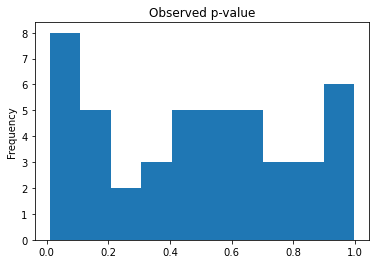

In [95]:
pvalues = get_pvalues_from_experiment(10, 100)
plt.hist(pvalues)
plt.ylabel('Frequency')
plt.title('Observed p-value');

Let's dial up our `N` parameter to get a better sense. Keep in mind that the number of p-values will increase at a rate of

$$\frac{N (N-1)}{2}$$

or approximately quadratically. Therefore we don't need to increase `N` by much.

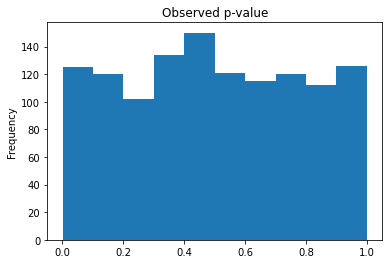

In [96]:
pvalues = get_pvalues_from_experiment(50, 100)
plt.hist(pvalues)
plt.ylabel('Frequency')
plt.title('Observed p-value');

Starting to look pretty flat, as we expected. Lastly, just to visualize the process of drawing a cutoff, we'll draw two artificial lines.

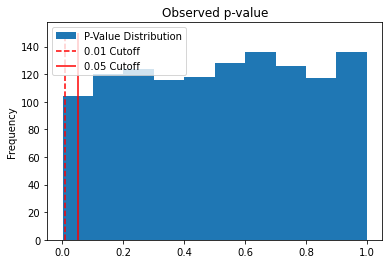

In [97]:
pvalues = get_pvalues_from_experiment(50, 100)
plt.vlines(0.01, 0, 150, colors='r', linestyle='--', label='0.01 Cutoff')
plt.vlines(0.05, 0, 150, colors='r', label='0.05 Cutoff')
plt.hist(pvalues, label='P-Value Distribution')
plt.legend()
plt.ylabel('Frequency')
plt.title('Observed p-value');

We can see that with a lower cutoff we should expect to get fewer false positives. Let's check that with our above experiment.

In [98]:
num_experiments = 100

results = np.zeros((num_experiments,))

for i in range(num_experiments):
    # Run a single experiment
    result = do_experiment(20, 100, cutoff=0.01)
    
    # Count how many pairs
    n = len(result)
    
    # Add to array
    results[i] = n

In [99]:
np.mean(results)

1.95

And finally compare it to what we expected.

In [100]:
(N * (N-1) / 2) * 0.01

1.9000000000000001

#### Sensitivity / Specificity Tradeoff

As with any adjustment of p-value cutoff, we have a tradeoff. A lower cutoff decreases the rate of false positives, but also decreases the chance we find a real relationship (true positive). So you can't just decrease your cutoff to solve this problem.

https://en.wikipedia.org/wiki/Sensitivity_and_specificity

#### Reducing Multiple Comparisons Bias

You can't really eliminate multiple comparisons bias, but you can reduce how much it impacts you. To do so we have two options.

#### Option 1: Run fewer tests.

This is often the best option. Rather than just sweeping around hoping you hit an interesting signal, use your expert knowledge of the system to develop a great hypothesis and test that. This process of exploring the data, coming up with a hypothesis, then gathering more data and testing the hypothesis on the new data is considered the gold standard in statistical and scientific research. It's crucial that the data set on which you develop your hypothesis is not the one on which you test it. Because you found the effect while exploring, the test will likely pass and not really tell you anything. What you want to know is how consistent the effect is. Moving to new data and testing there will not only mean you only run one test, but will be an 'unbiased estimator' of whether your hypothesis is true. We discuss this a lot in other lectures.

#### Option 2: Adjustment Factors and Bon Ferroni Correction


If you must run many tests, try to correct your p-values. This means applying a correction factor to the cutoff you desire to obtain the one actually used when determining whether p-values are significant. The most conservative and common correction factor is Bon Ferroni.

#### Example: Bon Ferroni Correction

The concept behind Bon Ferroni is quite simple. It just says that if we run $m$ tests, and we have a significance level/cutoff of $a$, then we should use $a/m$ as our new cutoff when determining significance. The math works out because of the following.

Let's say we run $m$ tests. We should expect to see $ma$ false positives based on random chance that pass out cutoff. If we instead use $a/m$ as our cutoff, then we should expect to see $ma/m = a$ tests that pass our cutoff. Therefore we are back to our desired false positive rate of $a$.

Let's try it on our experiment above.

In [101]:
num_experiments = 100

results = np.zeros((num_experiments,))

N = 20

T = 100

desired_level = 0.05

num_tests = N * (N - 1) / 2

new_cutoff = desired_level / num_tests

for i in range(num_experiments):
    # Run a single experiment
    result = do_experiment(20, 100, cutoff=new_cutoff)
    
    # Count how many pairs
    n = len(result)
    
    # Add to array
    results[i] = n

In [102]:
np.mean(results)

0.05

As you can see, our number of significant results is now far lower on average. Which is good because the data was random to begin with.

#### These are Often Overly Conservative

Because Bon Ferroni is so stringent, you can often end up passing over real relationships. There is a good example in the following article

https://en.wikipedia.org/wiki/Multiple_comparisons_problem

Effectively, it assumes that all the tests you are running are independent, and doesn't take into account any structure in your data. You may be able to design a more finely tuned correction factor, but this is adding a layer of complexity and therefore a point of failure to your research. In general any time you relax your stringency, you need to be very careful not to make a mistake.

Because of the over-zealousness of Bon Ferroni, often running fewer tests is the better option. Or, if you must run many tests, reserve multiple sets of data so your candidate signals can undergo an out-of-sample round of testing. For example, you might have the following flow:

 * Let's say there are 100,000 possible relationships.
 * Run a test on each possible relationship, and pick those that passed the test.
 * With these candidates, run a test on a new out-of-sample set of data. Because you have many fewer candidates, you can now apply a Bon Ferroni correction to these p-values, or if necessary repeat another round of out-of-sample testing.

#### What is p-Hacking?

p-hacking is just intentional or accidental abuse of multiple comparisons bias. It is surprisingly common, even in academic literature. The excellent statistical news website FiveThirtyEight has a great visualization here:

https://fivethirtyeight.com/features/science-isnt-broken/

Wikipedia's article is also informative:

https://en.wikipedia.org/wiki/Data_dredging

In general, the concept is simple. By running many tests or experiments and then focusing only on the ones that worked, you can present false positives as real results. Keep in mind that this also applies to running many different models or different types of experiments and on different data sets. Imagine that you spend a summer researching a new model to forecast corn future prices. You try 50 different models until finally one succeeds. Is this just luck at this point? Certainly you would want to be more careful about validating that model and testing it out-of-sample on new data before believing that it works.

#### You can never eliminate, only reduce risk.

In general you can never completely eliminate multiple comparisons bias, you can only reduce the risk of false positives using techniques we described above. At the end of the day most ideas tried in research don't work, so you'll end up testing many different hypotheses over time. Just try to be careful and use common sense about whether there is sufficient evidence that a hypothesis is true, or that you just happened to get lucky on this iteration.

#### Use Out-of-Sample Testing

As mentioned above, out-of-sample testing is one of the best ways to reduce your risk. You should always use it, no matter the circumstances. Often one of the ways that false positives make it through your workflow is a lack of an out-of-sample test at the end.

### Singular Value Decomposition


In machine learning (ML), some of the most important linear algebra concepts are the singular value decomposition (SVD) and principal component analysis (PCA). With all the raw data collected, how can we discover structures? For example, with the interest rates of the last 6 days, can we understand its composition to spot trends?

This becomes even harder for high-dimensional raw data. It is like finding a needle in a haystack. SVD allows us to extract and untangle information. In this section, we will detail SVD and PCA. We assume you have basic linear algebra knowledge including rank and eigenvectors.

#### Misconceptions (optional for beginners)
I realize a few common questions that non-beginners may ask. Let me address the elephant in the room first. Is PCA dimension reduction? PCA reduces dimension but it is far more than that. I like the Wiki description (but if you don’t know PCA, this is just gibberish):

> *Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components.*

From a simplified perspective, PCA transforms data linearly into new properties that are not correlated with each other. For ML, positioning PCA as feature extraction may allow us to explore its potential better than dimension reduction.
What is the difference between SVD and PCA? SVD gives you the whole nine-yard of diagonalizing a matrix into special matrices that are easy to manipulate and to analyze. It lay down the foundation to untangle data into independent components. PCA skips less significant components. Obviously, we can use SVD to find PCA by truncating the less important basis vectors in the original SVD matrix.

#### Singular vectors & singular values
The matrix $A A^{T}$ and $ A^{T} A $ are very special in linear algebra. Consider any m × n matrix A, we can multiply it with $A^{T}$ to form $A A^{T}$ and $ A^{T} A$ separately. These matrices are
- symmetrical,
- square,
- at least positive semidefinite (eigenvalues are zero or positive),
- both matrices have the same positive eigenvalues, and
- both have the same rank $r$ as $A$.

In addition, the covariance matrices that we often use in ML are in this form. Since they are symmetric, we can choose its eigenvectors to be orthonormal (perpendicular to each other with unit length) — this is a fundamental property for symmetric matrices.

Let’s introduce some terms that frequently used in SVD. We name the eigenvectors for $A A^{T}$ as uᵢ and $ A^{T} A $ as $ v_{i} $ here and call these sets of eigenvectors $u$ and $v$ the singular vectors of $A$. Both matrices have the same positive eigenvalues. The square roots of these eigenvalues are called singular values.
Not too many explanations so far but let’s put everything together first and the explanations will come next. We concatenate vectors $ u_{i} $ into $U$ and $ v_{i} $ into $V$ to form orthogonal matrices.

Since these vectors are orthonormal, it is easy to prove that $U$ and $V$ obey


$$
\begin{array}{l}U^{T} U=I \\ V^{T} V=I\end{array}
$$

#### SVD
Let’s start with the hard part first. SVD states that any matrix $A$ can be factorized as:


$$
A=U S V^{T}
$$

where $U$ and $V$ are orthogonal matrices with orthonormal eigenvectors chosen from $A A^{T}$ and $ A^{T} A $ respectively. $S$ is a diagonal matrix with $r$ elements equal to the root of the positive eigenvalues of $A A^{T}$ or $ A^{T} A $ (both matrics have the same positive eigenvalues anyway). The diagonal elements are composed of singular values.
i.e. an $m × n$ matrix can be factorized as:


$$
A_{m \times n}=U_{m \times m} S_{m \times n} V_{n \times n}^{T}
$$

We can arrange eigenvectors in different orders to produce $U$ and $V$. To standardize the solution, we order the eigenvectors such that vectors with higher eigenvalues come before those with smaller values.

Comparing to eigendecomposition, SVD works on non-square matrices. $U$ and $V$ are invertible for any matrix in SVD and they are orthonormal which we love it. Without proof here, we also tell you that singular values are more numerical stable than eigenvalues.

#### Example

Before going too far, let’s demonstrate it with a simple example. This will make things very easy to understand.

$$
A=\left(\begin{array}{ccc}3 & 2 & 2 \\ 2 & 3 & -2\end{array}\right)
$$

We calculate:

$$
A A^{T}=\left(\begin{array}{cc}17 & 8 \\ 8 & 17\end{array}\right)
,
A^{T} A=\left(\begin{array}{ccc}13 & 12 & 2 \\ 12 & 13 & -2 \\ 2 & -2 & 8\end{array}\right)
$$


These matrices are at least positive semidefinite (all eigenvalues are positive or zero). As shown, they share the same positive eigenvalues (25 and 9). The figure below also shows their corresponding eigenvectors.

$A A^{T}$ 

$$ 
A A^{T}=\left(\begin{array}{cc}17 & 8 \\ 8 & 17\end{array}\right)
$$
 
Eigenvalues
$$
 \lambda_{1}=25, \lambda_{2}=9
$$
 

Eigenvectors

 
$$
u_{1}=\left(\begin{array}{c}1 / \sqrt{2} \\ 1 / \sqrt{2}\end{array}\right) \quad u_{2}=\left(\begin{array}{c}1 / \sqrt{2} \\ -1 / \sqrt{2}\end{array}\right)
$$

$ A^{T} A $

$$
A^{T} A=\left(\begin{array}{ccc}13 & 12 & 2 \\ 12 & 13 & -2 \\ 2 & -2 & 8\end{array}\right)
$$
 
 Eigenvalues
$$
 \lambda_{1}=25, \lambda_{2}=9, \lambda_{3}=0
$$
 
Eigenvectors
 
$$
v_{1}=\left(\begin{array}{c}1 / \sqrt{2} \\ 1 / \sqrt{2} \\ 0\end{array}\right) \quad v_{2}=\left(\begin{array}{c}1 / \sqrt{18} \\ -1 / \sqrt{18} \\ 4 / \sqrt{18}\end{array}\right) \quad v_{3}=\left(\begin{array}{c}2 / 3 \\ -2 / 3 \\ -1 / 3\end{array}\right)
$$
 

The singular values are the square root of positive eigenvalues, i.e. 5 and 3. Therefore, the SVD composition is

#### Reformulate SVD

Since matrix $V$ is orthogonal, $V^{T} V$ equals $I$. We can rewrite the SVD equation as:

$$
\begin{array}{l}A=U S V^{T} \\ A V=U S\end{array}
$$

This equation establishes an important relationship between $ u_{i} $ and $ v_{i} $.

Apply $AV = US$

This can be generalized as

$$
A v_{i}=\sigma_{i} u_{i}
$$

The SVD decomposition can be recognized as a series of outer products of $ u_{i} $ and $ v_{i} $.

$$
A=\sigma_{I} u_{1} v_{1}^{T}+\ldots+\sigma_{r} u_{r} v_{r}^{T}
$$

This formularization of SVD is the key to understand the components of A. It provides an important way to break down an m × n array of entangled data into r components. Since uᵢ and vᵢ are unit vectors, we can even ignore terms $\left(\sigma_{i} u_{i} v_{i}^{T}\right)
$ with very small singular value $\sigma_{i}$. (We will come back to this later.)
Let’s first reuse the example before and show how it works.
$$
A=\left(\begin{array}{ccc}3 & 2 & 2 \\ 2 & 3 & -2\end{array}\right)
$$


The matrix $A$ above can be decomposed as


$$
=5\left(\begin{array}{c}1 / \sqrt{2} \\ 1 / \sqrt{2}\end{array}\right)\left(\begin{array}{ccc}1 / \sqrt{2} & 1 / \sqrt{2} & 0\end{array}\right)+3\left(\begin{array}{c}1 / \sqrt{2} \\ -1 / \sqrt{2}\end{array}\right)\left(\begin{array}{ccc}1 / \sqrt{18} & -1 / \sqrt{18} & 4 / \sqrt{18}\end{array}\right)
$$
 
$$
=\left(\begin{array}{ccc}3 & 2 & 2 \\ 2 & 3 & -2\end{array}\right)
$$


#### Variance & covariance
In ML, we identify patterns and relationship. How do we identify the correlation of properties in data? Let’s start the discussion with an example. We sample the height and weight of 12 people and compute their means. We zero-center the original values by subtracting them with its mean. For example, Matrix $A$ below holds the adjusted zero-centered height and weight.
As we plot the data points, we can recognize height and weight are positively related. But how can we quantify such a relationship?

With a limited size of the samples, the sample mean is biased and correlated with the samples. The average square distance from this mean will be smaller than that from the general population. The sample covariance $S^{2}$, divided by $n-1$, compensates for the smaller value and can be proven to be an unbiased estimate for variance $\sigma^{2}$. 

#### Covariance matrices
Variance measures how a variable varies between itself while covariance is between two variables ($a$ and $b$).
We can hold all these possible combinations of covariance in a matrix called the covariance matrix $\Sigma$.

The diagonal elements hold the variances of individual variables (like height) and the non-diagonal elements hold the covariance between two variables.

The positive sample covariance indicates weight and height are positively correlated. It will be negative if they are negatively correlated and zero if they are independent.


#### Covariance matrix & SVD
We can use SVD to decompose the sample covariance matrix. Since σ₂ is relatively small compared with σ₁, we can even ignore the $\sigma_{2}$ term. When we train an ML model, we can perform a linear regression on the weight and height to form a new property rather than treating them as two separated and correlated properties (where entangled data usually make model training harder).

There are a few properties about a sample covariance matrix under the context of SVD:
- The total variance of the data equals the trace of the sample covariance matrix S which equals the sum of squares of $S$’s singular values. Equipped with this, we can calculate the ratio of variance lost if we drop smaller $\sigma_{i}$ terms. This reflects the amount of information lost if we eliminate them.
- The first eigenvector $u_{1}$ of $S$ points to the most important direction of the data. In our example, it quantifies the typical ratio between weight and height.
- The error, calculated as the sum of the perpendicular squared distance from the sample points to $u_{1}$, is the minimum when SVD is used.

#### Property
Covariance matrices are not only symmetric but they are also positive semidefinite. Because variance is positive or zero, $u^{T}Vu$ below is always greater or equal zero. By the energy test, $V$ is positive semidefinite.
Often, after some linear transformation $A$, we want to know the covariance of the transformed data. This can be calculated with the transformation matrix $A$ and the covariance of the original data.

#### Correlation matrix
A correlation matrix is a scaled version of the covariance matrix. A correlation matrix standardizes (scale) the variables to have a standard deviation of $1$.

Correlation matrix will be used if variables are in scales of very different magnitudes. Bad scaling may hurt ML algorithms like gradient descent.

#### Visualization
So far, we have a lot of equations. Let’s visualize what SVD does and develop the insight gradually. SVD factorizes a matrix $A$ into $USV^{T}$. Applying $A$ to a vector $x (Ax)$ can be visualized as performing a rotation $(V^{T})$, a scaling $(S)$ and another rotation $(U)$ on $x$.

<a ><img src="https://miro.medium.com/max/1400/1*LwmAwpNTGQ_a7n--n3LQpA.jpeg"  width="500" align="center"> </a>

As shown above, the eigenvector $v_{i}$ of $V$ is transformed into:

$$
A v_{i}=\sigma_{i} u_{i}
$$

Or in the full matrix form

<a ><img src="https://miro.medium.com/max/1400/1*q6aiiqcIx9ES2xaxcnxlyw.gif"  width="500" align="center"> </a>


#### Insight of SVD
Since $u_{i}$ and $v_{i}$ have unit length, the most dominant factor in determining the significance of each term is the singular value $\sigma_{i}$. We purposely sort $\sigma_{i}$ in the descending order. If the eigenvalues become too small, we can ignore the remaining terms $(+ \sigma_{i} u_{i} v_{i}^{T}+\ldots)$.
This formularization has some interesting implications. For example, we have a matrix contains the return of stock yields traded by different investors.

As a fund manager, what information can we get out of it? Finding patterns and structures will be the first step. Maybe, we can identify the combination of stocks and investors that have the largest yields. SVD decompose an n × n matrix into r components with the singular value σᵢ demonstrating its significant. Consider this as a way to extract entangled and related properties into fewer principal directions with no correlations.
If data is highly correlated, we should expect many σᵢ values to be small and can be ignored.

In our previous example, weight and height are highly related. If we have a matrix containing the weight and height of 1000 people, the first component in the SVD decomposition will dominate. The $u_{1}$ vector indeed demonstrates the ratio between weight and height among these 1000 people as we discussed before.


```j
numpy.linalg.svd(a, full_matrices=True, compute_uv=True, hermitian=False)
```
https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html

### Principal Component Analysis

Technically, SVD extracts data in the directions with the highest variances respectively. PCA is a linear model in mapping m-dimensional input features to k-dimensional latent factors (k principal components). If we ignore the less significant terms, we remove the components that we care less but keep the principal directions with the highest variances (largest information).


<a ><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/GaussianScatterPCA.svg/1280px-GaussianScatterPCA.svg.png"  width="500" align="center"> </a>

PCA of a multivariate Gaussian distribution centered at (1,3) with a standard deviation of 3 in roughly the (0.866, 0.5) direction and of 1 in the orthogonal direction. The vectors shown are the eigenvectors of the covariance matrix scaled by the square root of the corresponding eigenvalue, and shifted so their tails are at the mean.


Applications in many fields, such as image processing, bioinformatics, and quantitative finance, involve large-scale data. Both the size and complexity of this data can make the computations required for analysis practically infeasible. Principal Component Analysis (PCA) is a classical method for dimension reduction. It uses the first several **principal components**, statistical features that explain most of the variation of a $m \times n$ data matrix $\mathbf{X}$, to describe the large-scale data matrix $\mathbf{X}$ economically.   

In [1]:
from numpy import linalg as LA

We will introduce PCA with an image processing example. A grayscale digital image can be represented by a matrix, whose $(i,j)^{th}$ entry corresponds to the measurement of gray
scale at the $(i,j)^{th}$ pixel. The following gray-scale image has $200 \times 200$ pixels, though it can be changed on the fly. We store it in a matrix $\mathbf{X}$. The number of rows of the  $\mathbf{X}$ is $200$, and the number of columns of $\mathbf{X}$ is $200$.

In [2]:
def generate_test_image(m,n):
    X = np.zeros((m,n))
# generate a rectangle
    X[25:80,25:80] = 1
# generate a triangle
    for i in range(25, 80, 1):
        X[i+80:160, 100+i-1] = 2
# generate a circle
    for i in range(0,200,1):
        for j in range(0,200,1):
            if ((i - 135)*(i - 135) +(j - 53)*(j - 53) <= 900):
                X[i, j] = 3
    return X
X = generate_test_image(200,200)

We start with a simple checkboard pattern, add some random normal noise, and add a gradient.

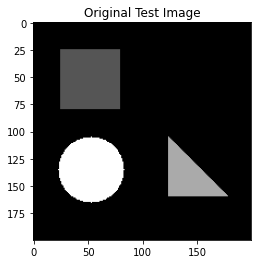

In [3]:
imgplot = plt.imshow(X, cmap='gray')
plt.title('Original Test Image');

In [4]:
m = X.shape[0] # num of rows
n = X.shape[1] # num of columns

Set each row as a variable, with observations in the columns. Denote the covariance matrix of $\mathbf{X}$ as $\mathbf{C}$, where the size of $\mathbf{C}$ is $m \times m$. $\mathbf{C}$ is a matrix whose $(i,j)^{th}$ entry is the covariance between the $i^{th}$ row and $j^{th}$ row of the matrix $\mathbf{X}$.

In [5]:
X = np.asarray(X, dtype=np.float64)
C = np.cov(X)

In [6]:
np.linalg.matrix_rank(C)

62

Performing principal component analysis decomposes the matrix $\mathbf{C}$ into:

$$\mathbf{C} = \mathbf{L}\mathbf{P}\mathbf{L}^{\top},$$

where $\mathbf{P}$ is a diagonal matrix $\mathbf{P}=\text{diag}(\lambda_1,\lambda_2,\dots,\lambda_m)$, with $\lambda_1 \geq \lambda_1 \geq \dots \lambda_m \geq 0$ being the eigenvalues of matrix $\mathbf{C}$. The matrix $\mathbf{L}$ is an orthogonal matrix, consisting the eigenvectors of matrix $\mathbf{C}$.

In [7]:
P, L = LA.eigh(C)

The function `LA.eigh` lists the eigenvalues from small to large in $P$. Let us change the order first to list them from largest to smallest and make sure that $\mathbf{L}\mathbf{P}\mathbf{L}^{\top}==\mathbf{C}$. 

In [8]:
P = P[::-1]
L = L[:,::-1]

In [9]:
np.allclose(L.dot(np.diag(P)).dot(L.T), C)

True

Here we plot all of the eigenvalues:

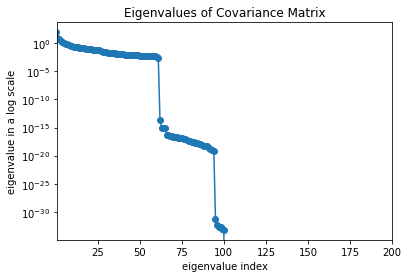

In [10]:
plt.semilogy(P, '-o')
plt.xlim([1, P.shape[0]])
plt.xlabel('eigenvalue index')
plt.ylabel('eigenvalue in a log scale')
plt.title('Eigenvalues of Covariance Matrix');

The $i^{th}$ **principal component** is given as $i^{th}$ row of $\mathbf{V}$, 

 $$\mathbf{V} =\mathbf{L}^{\top} \mathbf{X}.$$


In [11]:
V = L.T.dot(X)

In [12]:
V.shape

(200, 200)

If we multiply both sides on the left by $\mathbf{L}$, we get the following:

 $$\mathbf{L}\mathbf{L}^{\top} \mathbf{X}= \mathbf{L}\mathbf{V}.$$

The matrix $\mathbf{L}$ is the set of eigenvectors from a covariance matrix , so $\mathbf{L}\mathbf{L}^{\top} = \mathbf{I}$ and $\mathbf{L}\mathbf{L}^{\top}\mathbf{X} = \mathbf{X}$. The relationship among matrices of $\mathbf{X}$, $\mathbf{L}$, and $\mathbf{V}$ can be expressed as
 
$$\mathbf{X} = \mathbf{L}\mathbf{V}.$$


To approximate $\mathbf{X}$, we use $k$ eigenvectors that have largest eigenvalues:

$$\mathbf{X} \approx \mathbf{L[:, 1:k]}\mathbf{L[:, 1:k]}^{\top} \mathbf{X}.$$

Denote the approximated $\mathbf{X}$ as $\tilde{\mathbf{X}} = \mathbf{L[:, 1:k]}\mathbf{L[:, 1:k]}^{\top} \mathbf{X}$. When $k = m $, the $\tilde{\mathbf{X}}$ should be same as $\mathbf{X}$.

In [13]:
k = 200
X_tilde =  L[:,0:k-1].dot(L[:,0:k-1].T).dot(X)

In [14]:
np.allclose(X_tilde, X)

True

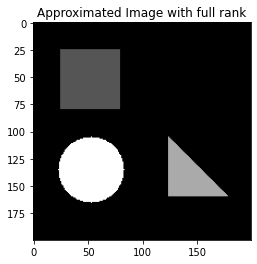

In [15]:
plt.imshow(X_tilde, cmap='gray')
plt.title('Approximated Image with full rank');

The proportion of total variance due to the $i^{th}$ principal component is given by the ratio $\frac{\lambda_i}{\lambda_1 + \lambda_2 + \dots \lambda_m}.$ The sum of proportion of total variance should be $1$. As we defined, $\lambda_i$ is $i^{th}$ entry of $\mathbf{P}$, 

$$\sum_{i}\frac{P_i}{\text{trace}(P)} = 1$$

Where the trace$(P)$ is the sum of the diagonal of $P$.

In [16]:
(P/P.sum()).sum()

1.0

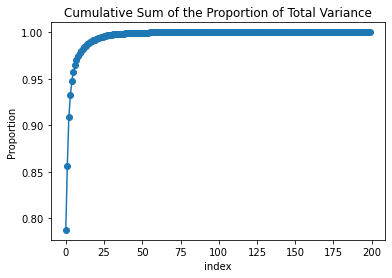

In [17]:
plt.plot((P/P.sum()).cumsum(), '-o')
plt.title('Cumulative Sum of the Proportion of Total Variance')
plt.xlabel('index')
plt.ylabel('Proportion');

Recall the number of principal components is denoted as $k$. Let $k$ be $10, 20, 30, 60$ as examples and take a look at the corresponding approximated images.

In [18]:
X_tilde_10 = L[:,0:10-1].dot(V[0:10-1,:])
X_tilde_20 = L[:,0:20-1].dot(V[0:20-1,:])
X_tilde_30 = L[:,0:30-1].dot(V[0:30-1,:])
X_tilde_60 = L[:,0:60-1].dot(V[0:60-1,:])

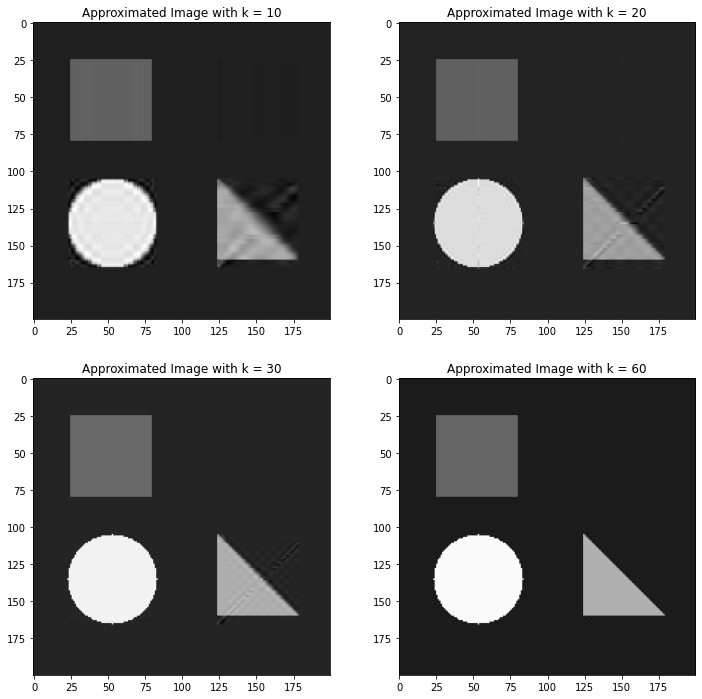

In [19]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))
ax1.imshow(X_tilde_10, cmap='gray')
ax1.set(title='Approximated Image with k = 10')
ax2.imshow(X_tilde_20, cmap='gray')
ax2.set(title='Approximated Image with k = 20')
ax3.imshow(X_tilde_30, cmap='gray')
ax3.set(title='Approximated Image with k = 30')
ax4.imshow(X_tilde_60, cmap='gray')
ax4.set(title='Approximated Image with k = 60');

The number of variables in $X$ is $200$. When reducing the dimension to $k=60$, which uses half of the principal components, the approximated image is close to the original one.

Moving forward, we do not have to do PCA by hand. Luckly, [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) has an implementation that we can use. Next, let us show an example in quantitative finance using sklearn.

#### PCA on a Portfolio

Construct a portfolio with 10 stocks, IBM, MSFT, FB, T, INTC, ABX, NEM, AU, AEM, GFI. 5 of them are technology related and 5 of them are gold mining companies.

In this case, there are 10 variables (companies), and each column is a variable.

In [48]:
from backtester.dataSource.yahoo_data_source import YahooStockDataSource


startDateStr = '2015/09/01'
endDateStr = '2016/11/01'
cachedFolderName = '../data/'
dataSetId = 'Data'
instrumentIds = ['AAPL','IBM','MSFT', 'FB', 'T', 'INTC','NEM', 'AU', 'AEM', 'GFI']
ds = YahooStockDataSource(cachedFolderName=cachedFolderName,
                            dataSetId=dataSetId,
                            instrumentIds=instrumentIds,
                            startDateStr=startDateStr,
                            endDateStr=endDateStr,
                            event='history')
portfolio_returns = ds.getBookDataByFeature()['adjClose']

Processing data for stock: AAPL
Processing data for stock: IBM
Processing data for stock: MSFT
Processing data for stock: FB
Processing data for stock: T
Processing data for stock: INTC
Processing data for stock: NEM
Processing data for stock: AU
Processing data for stock: AEM
Processing data for stock: GFI
20% done...
40% done...
60% done...
80% done...


In [49]:
portfolio_returns.pct_change()[1:]

,AAPL,IBM,MSFT,FB,T,INTC,NEM,AU,AEM,GFI
2015-09-01,-0.044697,-0.035229,-0.039062,-0.024600,-0.026506,-0.025228,-0.019918,-0.062808,-0.014297,-0.074304
2015-09-02,0.042889,0.016611,0.036824,0.030494,0.015470,0.028037,-0.031082,0.000000,-0.021135,-0.050167
2015-09-03,-0.017536,0.011927,0.003229,-0.019357,0.006703,0.016783,-0.001234,0.007884,-0.035140,0.007042
2015-09-04,-0.009966,-0.020984,-0.020459,0.001248,-0.014528,-0.019257,-0.030266,-0.009126,0.000877,0.010490
2015-09-08,0.027821,0.024565,0.030040,0.014389,0.017813,0.034362,0.018182,0.026316,-0.006576,-0.010381
...,...,...,...,...,...,...,...,...,...,...
2016-10-25,0.005100,0.002059,-0.000164,-0.007428,-0.004341,-0.004538,0.020926,0.023686,0.026921,0.036855
2016-10-26,-0.022495,0.006164,-0.005903,-0.009449,-0.007357,-0.005128,-0.011205,-0.023138,-0.023997,-0.033175
2016-10-27,-0.009603,0.010144,-0.008741,-0.010302,0.002470,-0.003150,-0.038419,-0.011103,0.007645,-0.012255
2016-10-28,-0.006639,-0.004826,-0.003827,0.012337,-0.000274,-0.002011,0.016959,0.011976,0.012918,0.004963


In [50]:
from sklearn.decomposition import PCA
num_pc = 2

X = np.asarray(portfolio_returns)
[n,m] = X.shape

print( 'The number of timestamps is {}.'.format(n))
print ('The number of stocks is {}.'.format(m))

pca = PCA(n_components=num_pc) # number of principal components
pca.fit(X)
percentage =  pca.explained_variance_ratio_
percentage_cum = np.cumsum(percentage)
print ('{0:.2f}% of the variance is explained by the first 2 PCs'.format(percentage_cum[-1]*100))

pca_components = pca.components_


The number of timestamps is 296.
The number of stocks is 10.
93.37% of the variance is explained by the first 2 PCs


Notice that the grand bulk of the variance of the returns of these assets can be explained by the first two principal components.

Now we collect the first two principal components and plot their contributions.

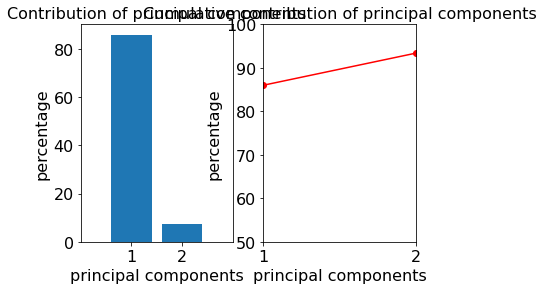

In [51]:
x = np.arange(1,len(percentage)+1,1)

plt.subplot(1, 2, 1)
plt.bar(x, percentage*100, align = "center")
plt.title('Contribution of principal components',fontsize = 16)
plt.xlabel('principal components',fontsize = 16)
plt.ylabel('percentage',fontsize = 16)
plt.xticks(x,fontsize = 16) 
plt.yticks(fontsize = 16)
plt.xlim([0, num_pc+1])

plt.subplot(1, 2, 2)
plt.plot(x, percentage_cum*100,'ro-')
plt.xlabel('principal components',fontsize = 16)
plt.ylabel('percentage',fontsize = 16)
plt.title('Cumulative contribution of principal components',fontsize = 16)
plt.xticks(x,fontsize = 16) 
plt.yticks(fontsize = 16)
plt.xlim([1, num_pc])
plt.ylim([50,100]);

From these principal components we can construct "statistical risk factors", similar to more conventional common risk factors. These should give us an idea of how much of the portfolio's returns comes from some unobservable statistical feature.

In [52]:
factor_returns = X.dot(pca_components.T)
factor_returns = pd.DataFrame(columns=["factor 1", "factor 2"], 
                              index=portfolio_returns.index,
                              data=factor_returns)
factor_returns.head()

,factor 1,factor 2
2015-08-31,129.169339,7.176986
2015-09-01,125.457241,7.446443
2015-09-02,127.504414,9.012677
2015-09-03,126.849886,7.286196
2015-09-04,125.459780,8.388414


The factor returns here are an analogue to the principal component matrix $\mathbf{V}$ in the image processing example. 

In [53]:
factor_exposures = pd.DataFrame(index=["factor 1", "factor 2"], 
                                columns=portfolio_returns.columns,
                                data = pca.components_).T

In [54]:
factor_exposures

,factor 1,factor 2
AAPL,-0.004770,0.050496
IBM,0.431070,-0.547299
MSFT,0.134560,0.396356
FB,0.526710,0.669417
T,0.138696,-0.026431
INTC,0.077957,0.123004
NEM,0.416316,-0.120515
AU,0.197032,-0.184029
AEM,0.528319,-0.166658
GFI,0.045286,-0.026495


The factor exposures are an analogue to the eigenvector matrix $\mathbf{L}$ in the image processing example.

In [55]:
labels = factor_exposures.index
data = factor_exposures.values

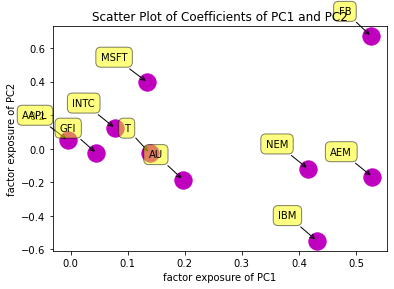

In [56]:
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    data[:, 0], data[:, 1], marker='o', s=300, c='m',
    cmap=plt.get_cmap('Spectral'))
plt.title('Scatter Plot of Coefficients of PC1 and PC2')
plt.xlabel('factor exposure of PC1')
plt.ylabel('factor exposure of PC2')

for label, x, y in zip(labels, data[:, 0], data[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    );

Creating statistical risk factors allows us to further break down the returns of a portfolio to get a better idea of the risk.

---
---


# 3. Preferred Statistical Characteristics of Data <a id="10"></a>

You do not want to consume someone else’s processed dataset, as the likely outcome will be that you discover what someone else already knows or will figure out soon. Ideally your starting point is a collection of unstructured, raw data that you are going to process in a way that will lead to informative features.

1. **Fundamental data:** is extremely regularized and low frequency. Being so accessible to the marketplace, it is rather unlikely that there is much value left to be exploited.
1. **Market Data:** a raw feed, with all sorts of unstructured information, that even allows you to reconstruct the trading book, or the full collection of BWIC (bids wanted in competition). (Every market participant leaves a characteristic footprint in the trading records, and with enough patience, you will find a way to anticipate a competitor’s next move. For example, TWAP algorithms leave a very particular footprint that is used by predatory algorithms to front-run their end-of-day trading (usually hedging) activity.)
1. **Analytics:** *derivative data* --> not readily available from an original source (e.g. in-depth analyses of companies’ business models, activities, competition, outlook, etc. Sentiment extracted from news reports... --> costly, the methodology used in their production may be biased or opaque, and you will not be the sole consumer.
1. **Alternative Data:** What truly characterizes alternative data is that it is primary information, that is, information that has not made it to the other sources. e.g. : before Exxon Mobile reported increased earnings, there were movements of tankers and drillers and pipeline traffic. 


**Our todays objective:** learn how to produce a continuous, homogeneous, and structured dataset from a collection of unstructured financial data. 

### Frequency

Financial Markets are prone to have a low Signal-to-Noise Ratio. Therefore most of the information is *useless*.
The lower the frequency, the more random each fluctuation appears to bet.
Don't try to hunt down the lowest frequency Dataset available and work with solid statistical models.

### BARS

Most ML algorithms assume a table representation of the extracted data. Finance practitioners often refer to those tables’ rows as 'bars'.

1. **Time Bars:** most popular among practitioners and academics, but they should be avoided for two reasons. First, markets do not process information at a constant time interval. The hour following the open is much more active than the hour around noon. Second, time-sampled series often exhibit poor statistical properties, like serial correlation, heteroscedasticity, and non-normality of returns. 
1. **Tick Bars:** The sample variables (timestamp, VWAP, open price, etc.) will be extracted each time a pre-defined number of transactions takes place, e.g., 1,000 ticks. This allows us to synchronize sampling with a proxy of information arrival (the speed at which ticks are originated). Mandelbrot and Taylor [1967] were among the first to realize that sampling as a function of the number of transactions exhibited desirable statistical properties: “Price changes over a fixed number of transactions may have a Gaussian distribution. Price changes over a fixed time period may follow a stable Paretian distribution, whose variance is infinite.
1. **Volume Bars:** One problem with tick bars is that order fragmentation introduces some arbitrariness in the number of ticks. For example, suppose that there is one order sitting on the offer, for a size of 10. If we buy 10 lots, our one order will be recorded as one tick. If instead on the offer there are 10 orders of size 1, our one buy will be recorded as 10 separate transactions. After volume started to be reported as well, Clark [1973] realized that sampling returns by volume achieved even better statistical properties (i.e., closer to an IID Gaussian distribution) than sampling by tick bars.
1. **Dollar Bars**: Dollar bars are formed by sampling an observation every time a pre-defined mar- ket value is exchanged. The number of shares traded is a function of the actual value exchanged. Therefore, it makes sense sampling bars in terms of dollar value exchanged, rather than ticks or volume, particularly when the analysis involves significant price fluctuations
*(volume or dollar bars' volatilities are much closer to constant (homoscedasticity)*


<a ><img src="Pictures/normality.png" Width="700" align="center"> </a>


Partial recovery of normality through a price sampling process subordinated to a volume, tick and dollar clock.<br >
 *(Normal Distribution is often an assumption for further calculations, e.g. Maximum Likelyhood Estimators for simple GARCH Models)*

#### How to convert a time series to dollar bars as Pandas Dataframe: 

```js

#!pip install mlfinlab

get_volume_bars(file_path_or_df: Union[str, Iterable[str], pandas.core.frame.DataFrame], threshold: Union[float, pandas.core.series.Series] = 70000000, batch_size: int = 20000000, verbose: bool = True, to_csv: bool = False, output_path: Optional[str] = None)
```

## A. Skewness and Kurtosis <a id="11"></a>

Sometimes mean and variance are not enough to describe a distribution. When we calculate variance, we square the deviations around the mean. In the case of large deviations, we do not know whether they are likely to be positive or negative. This is where the skewness and symmetry of a distribution come in. A distribution is <i>symmetric</i> if the parts on either side of the mean are mirror images of each other. For example, the normal distribution is symmetric. The normal distribution with mean $\mu$ and standard deviation $\sigma$ is defined as
$$ f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $$

### Skewness
A distribution which is not symmetric is called <i>skewed</i>. For instance, a distribution can have many small positive and a few large negative values (negatively skewed) or vice versa (positively skewed), and still have a mean of 0. A symmetric distribution has skewness 0. Positively skewed unimodal (one mode) distributions have the property that mean > median > mode. Negatively skewed unimodal distributions are the reverse, with mean < median < mode. All three are equal for a symmetric unimodal distribution.

The explicit formula for skewness is:
$$ S_K = \frac{n}{(n-1)(n-2)} \frac{\sum_{i=1}^n (X_i - \mu)^3}{\sigma^3} $$

Where $n$ is the number of observations, $\mu$ is the arithmetic mean, and $\sigma$ is the standard deviation. The sign of this quantity describes the direction of the skew as described above. We can plot a positively skewed and a negatively skewed distribution to see what they look like. For unimodal distributions, a negative skew typically indicates that the tail is fatter on the left, while a positive skew indicates that the tail is fatter on the right.

### Kurtosis

Kurtosis attempts to measure the shape of the deviation from the mean. Generally, it describes how peaked a distribution is compared the the normal distribution, called mesokurtic. All normal distributions, regardless of mean and variance, have a kurtosis of 3. A leptokurtic distribution (kurtosis > 3) is highly peaked and has fat tails, while a platykurtic distribution (kurtosis < 3) is broad. Sometimes, however, kurtosis in excess of the normal distribution (kurtosis - 3) is used, and this is the default in `scipy`. A leptokurtic distribution has more frequent large jumps away from the mean than a normal distribution does while a platykurtic distribution has fewer.

The formula for kurtosis is
$$ K = \left ( \frac{n(n+1)}{(n-1)(n-2)(n-3)} \frac{\sum_{i=1}^n (X_i - \mu)^4}{\sigma^4} \right ) $$

while excess kurtosis is given by
$$ K_E = \left ( \frac{n(n+1)}{(n-1)(n-2)(n-3)} \frac{\sum_{i=1}^n (X_i - \mu)^4}{\sigma^4} \right ) - \frac{3(n-1)^2}{(n-2)(n-3)} $$

For a large number of samples, the excess kurtosis becomes approximately

$$ K_E \approx \frac{1}{n} \frac{\sum_{i=1}^n (X_i - \mu)^4}{\sigma^4} - 3 $$

Since above we were considering perfect, continuous distributions, this was the form that kurtosis took. However, for a set of samples drawn for the normal distribution, we would use the first definition, and (excess) kurtosis would only be approximately 0.

<a ><img src="Pictures/Kurtosis.jpg" Width="850" align="center"> </a>

## B. Stationarity <a id="12"></a>

### Stationarity/Non-Stationarity

A commonly untested assumption in time series analysis is the stationarity of the data. Data are stationary when the parameters of the data generating process do not change over time. 

*Mean of a time series $x_t$ is $E(x_t)=\mu(t)$*

*Variance of a time series $x_t$ is $\sigma^2(t)=E[(x_t - \mu(t))^2]$*

**A time series is stationary in the mean if $\mu(t)=\mu$, i.e.mean is constant with time**

**A time series is stationary in the variance if $\sigma^2(t)=\sigma^2$, i.e. variance is constant with time**

<a ><img src="Pictures/stationarity.png" Width="600" align="center"> </a>



#### Why Non-Stationarity is Dangerous

Many statistical tests, deep down in the fine print of their assumptions, require that the data being tested are stationary. A stationary time series (TS) is simple to predict as we can assume that future statistical properties are the same or proportional to current statistical properties.If you naively use certain statistics on a non-stationary data set, you will get garbage results. As an example, let's take an average through our non-stationary $B$.

<ipython-input-3-43befbd89106>:9: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



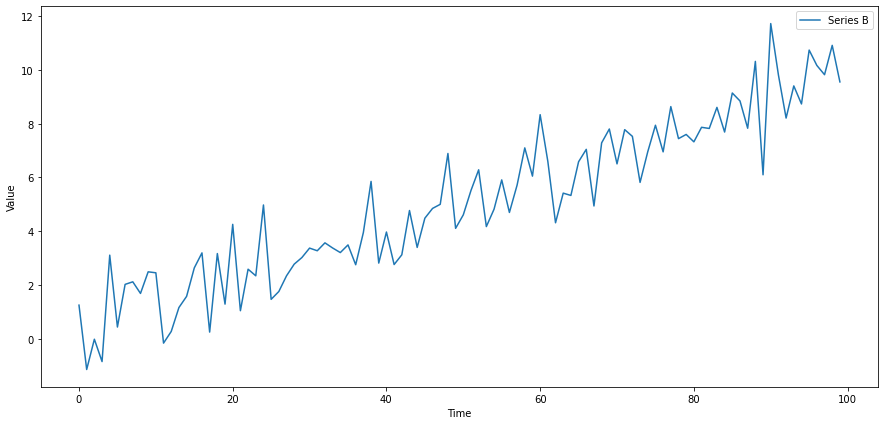

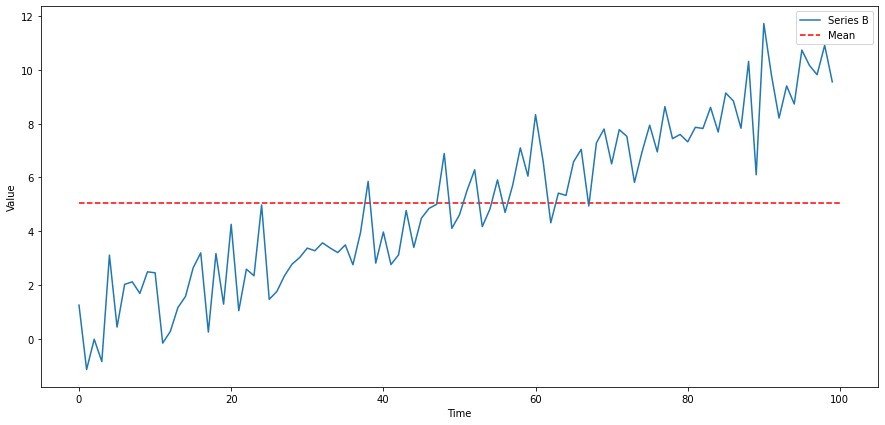

In [3]:
def generate_datapoint(params):
    mu = params[0]
    sigma = params[1]
    return np.random.normal(mu, sigma)

# Set the number of datapoints
T = 100

B = pd.Series(index=range(T))
B.name = 'B'

for t in range(T):
    # Now the parameters are dependent on time
    # Specifically, the mean of the series changes over time
    params = (t * 0.1, 1)
    B[t] = generate_datapoint(params)
plt.figure(figsize=(15,7))
plt.plot(B)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(['Series B'])


m = np.mean(B)
plt.figure(figsize=(15,7))
plt.plot(B)
plt.hlines(m, 0, len(B), linestyles='dashed', colors='r')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(['Series B', 'Mean'])
plt.show()

The computed mean will show the mean of all data points till date, but won't be useful for any forecasting of future state. It's meaningless when compared with any specfic time, as it's a collection of different states at different times mashed together. This is just a simple and clear example of why non-stationarity can screw with analysis, much more subtle problems can arise in practice.

#### Testing for Stationarity

Now we want to check for stationarity using a statistical test. We performthe standard [Augmented Dickey Fuller test](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test)

The testing procedure for the ADF test is the same as for the Dickey–Fuller test but it is applied to the model
$$
\Delta y_{t}=\alpha+\beta t+\gamma y_{t-1}+\delta_{1} \Delta y_{t-1}+\cdots+\delta_{p-1} \Delta y_{t-p+1}+\varepsilon_{t}
$$
where $ \alpha $  is a constant, $\beta$  the coefficient on a time trend and $ p $ the lag order of the autoregressive process. Imposing the constraints $\alpha =0 $and $\beta =0$ corresponds to modelling a random walk and using the constraint {$\beta =0 $corresponds to modeling a random walk with a drift. Consequently, there are three main versions of the test, analogous to the ones discussed on Dickey–Fuller test (see that page for a discussion on dealing with uncertainty about including the intercept and deterministic time trend terms in the test equation.)

By including lags of the order $p$ the ADF formulation allows for higher-order autoregressive processes. This means that the lag length $p$ has to be determined when applying the test. One possible approach is to test down from high orders and examine the t-values on coefficients. An alternative approach is to examine information criteria such as the Akaike information criterion, Bayesian information criterion or the Hannan–Quinn information criterion.

The unit root test is then carried out under the null hypothesis $ \gamma = 0 $ against the alternative hypothesis of $\gamma < 0$. Once a value for the test statistic

$$
\mathrm{DF}_{\tau}=\frac{\hat{\gamma}}{\mathrm{SE}(\hat{\gamma})}
$$

is computed it can be compared to the relevant critical value for the Dickey–Fuller test. As this test is asymmetrical, we are only concerned with negative values of our test statistic ${DF} _{\tau }$ . If the calculated test statistic is less (more negative) than the critical value, then the null hypothesis of $\gamma = 0$ is rejected and no unit root is present.

In [12]:
def check_for_stationarity(X, cutoff=0.01):
    # We must observe significant p-value to convince ourselves that the series is stationary
    pvalue = adfuller(X)[1]
    if pvalue < cutoff:
        print('p-value = ' + str(pvalue) + ' The series ' + X.name +' is likely stationary.')
        return True
    else:
        print('p-value = ' + str(pvalue) + ' The series ' + X.name +' is likely non-stationary.')
        return False

In [13]:
check_for_stationarity(B);

p-value = 0.9954091618828629 The series B is likely non-stationary.


A cyclic movement of the mean will be very difficult to tell apart from random noise. In practice on noisy data and limited sample size it can be hard to determine if a series is stationary and whether any drift is random noise or part of a trend. In each individual case the test may or may not pick up subtle effects like this.

Let's try this out on some real pricing data.

In [7]:
from backtester.dataSource.yahoo_data_source import YahooStockDataSource


startDateStr = '2007/01/01'
endDateStr = '2015/01/01'
cachedFolderName = '../data/'
dataSetId = 'Data'
instrumentIds = ['AAPL']
ds = YahooStockDataSource(cachedFolderName=cachedFolderName,
                            dataSetId=dataSetId,
                            instrumentIds=instrumentIds,
                            startDateStr=startDateStr,
                            endDateStr=endDateStr,
                            event='history')
X = ds.getBookDataByFeature()['adjClose']


Processing data for stock: AAPL
20% done...
40% done...
60% done...
80% done...


In [8]:
check_for_stationarity(X['AAPL']);

p-value = 0.988576841925491 The series AAPL is likely non-stationary.


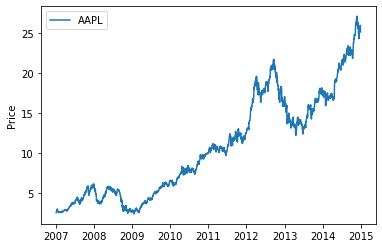

In [9]:
plt.plot(X.index, X.values)
plt.ylabel('Price')
plt.legend(X.columns.values)
plt.show()

Now let's take the delta of the series, giving us the additive returns. We'll check if this is stationary.

p-value = 4.713381433447085e-27 The series ['AAPL'] Additive Returns is likely stationary.


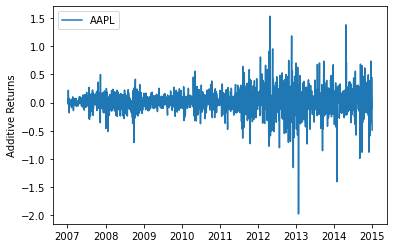

In [10]:
X1 = X['AAPL'].diff()[1:]
X1.name = (str(X.columns.values) + ' Additive Returns')
check_for_stationarity(X1)
plt.plot(X1.index, X1.values)
plt.ylabel('Additive Returns')
plt.legend(X.columns.values)
plt.show()

Seems like the additive returns are stationary. That means we will probably be able to model the returns much better than the price. It also means that the price was $I(1)$.

Let's also check the multiplicative returns.

p-value = 0.0 The series ['AAPL'] Multiplicative Returns is likely stationary.


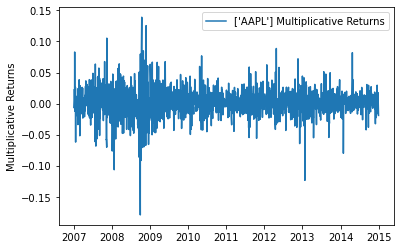

In [11]:
X1 = X['AAPL'].pct_change()[1:]
X1.name = str(X.columns.values) + ' Multiplicative Returns'
check_for_stationarity(X1)
plt.plot(X1.index, X1.values)
plt.ylabel('Multiplicative Returns')
plt.legend([X1.name])
plt.show()

Seems like the multiplicative returns are also stationary. Both the multiplicative and additive deltas on a series get at similar pieces of information, so it's not surprising both are stationary. In practice this might not always be the case.

##### Reminder

As always, you should not naively assume that because a time series is stationary in the past it will continue to be stationary in the future. Tests for consistency of stationarity such as cross validation and out of sample testing are necessary. This is true of any statistical property, we just reiterate it here. Returns may also go in and out of stationarity, and may be stationary or non-stationary depending on the timeframe and sampling frequency.



##### Note: Returns Analysis

The reason returns are usually used for modeling in quantitive finance is that they are far more stationary than prices. This makes them easier to model and returns forecasting more feasible. Forecasting prices is more difficult, as there are many trends induced by their $I(1)$ integration. Even using a returns forecasting model to forecast price can be tricky, as any error in the returns forecast will be magnified over time.

Cointegration is the trick that makes regression work on non-stationary series, so that memory is preserved.

## C. Integration  <a id="13"></a>

### Moving Average Representation

An important concept in time series analysis is moving average representation. We will discuss this briefly here, but a more complete explanation is available in the ARMA and ARIMA Backup. Also check Wikipedia as listed below.

This representation expresses any time series $Y_t$ as 

$$Y_t = \sum_{j=0}^\infty b_j \epsilon_{t-j} + \eta_t$$

* $\epsilon$ is the residuals or errors - a stochastic white noise process
* $b_j$ are the moving average weights of residuals
* $\eta$ is a deterministic series

$\eta$ is deterministic (such as a sine wave),something we could perfectly model it. The difference between predictions from this model ($\eta$) and actual observations leads to residuals($\epsilon$). The residuals are stochastic and there to simulate new information occuring over time. 

Specifically, $\epsilon_t = \hat Y_t - Y_t$ where $\hat Y_t$ is the in the optimal forecast of $Y_t$(actual observed value) using only information from time before $t$. In other words, the best prediction you can make at time $t-1$ cannot account for the randomness in $\epsilon$.

Each $b_j$ just says how much previous values of $\epsilon$ influence $Y_t$.


### Back to Order of Integration

We will note integration order-i as $I(i)$.

A time series is said to be $I(0)$ if the following condition holds in a moving average representation. In simpler terms, the autocorrelation of the series decays to 0 sufficiently quickly.

$$\sum_{k=0}^\infty |b_k|^2 < \infty$$

This property turns out to be true of all stationary series since autocorrelation is 0, but by itself is not enough for stationarity to hold. This means that stationarity implies $I(0)$, but $I(0)$ does not imply stationarity. For more on orders of integration, please see the following links.

https://en.wikipedia.org/wiki/Order_of_integration

https://en.wikipedia.org/wiki/Wold%27s_theorem

### Testing for $I(0)$

In practice testing whether the sum of the autocorrelations is finite may not be possible. It is possible in a mathematical derivation, but when we have a finite set of data and a finite number of estimated autocorrelations, the sum will always be finite. Given this difficulty, tests for $I(0)$ rely on stationarity implying the property. If we find that a series is stationary, then it must also be $I(0)$.

Let's take our original stationary series B. Because A is stationary, we know it's also $I(0)$.

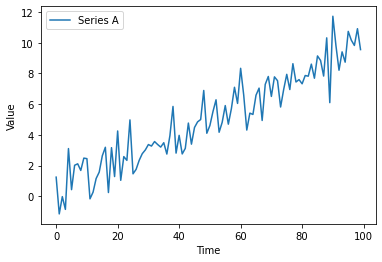

In [16]:
plt.plot(B)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(['Series A'])
plt.show()

### Building Up Orders of Integration

If one takes an $I(0)$ series and cumulatively sums it (discrete integration), the new series will be $I(1)$. Notice how this is related to the calculus concept of integration. The same relation applies in general, to get $I(n)$ take an $I(0)$ series and iteratively take the cumulative sum $n$ times.

Now let's make an $I(1)$ series by taking the cumulative sum of A.

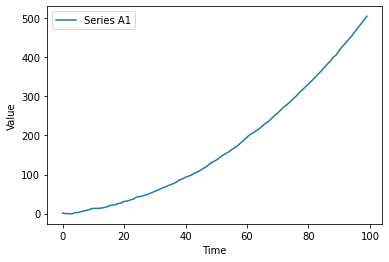

In [17]:
A1 = np.cumsum(B)

plt.plot(A1)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(['Series A1'])
plt.show()

### Breaking Down Orders of Integration

Conversely, to find the order of integration of a given series, we perform the inverse of a cumulative sum, which is the $\Delta$ or itemwise difference function. Specifically

$$(1-L) X_t = X_t - X_{t-1} = \Delta X$$

$$(1-L)^d X_t$$

In this case $L$ is the lag operator. Sometimes also written as $B$ for 'backshift'. $L$ fetches the second to last elements in a time series, and $L^k$ fetches the k-th to last elements. So 

$$L X_t = X_{t-1}$$

and

$$(1-L) X_t = X_t - X_{t-1}$$

A series $Y_t$ is $I(1)$ if the $Y_t - Y_t-1$ is $I(0)$. In other words, if you take an $I(0)$ series and cumulatively sum it, you should get an $I(1)$ series.


### Once all the math has settled, remember that any stationary series is $I(0)$

## D. Cointegration <a id="14"></a>

Finally, now that we've discussed stationarity and order of integration, we can discuss cointegration.

A linear combination of the time series ($X_1$, $X_2$, $\dots$, $X_k$) is a new time series $Y$ constructed as follows for any set of real numbers $b_1 \dots b_k$

$$Y = b_1X_1 + b_2X_2 + \dots + b_kX_k$$

For some set of time series ($X_1$, $X_2$, $\dots$, $X_k$), if all series are $I(1)$, and some linear combination of them is $I(0)$, we say the set of time series is cointegrated.

For example, $X_1$, $X_2$, and $X_3$ are all $I(1)$, and $2X_1 + X_2 + 0X_3 = 2X_1 + X_2$ is $I(0)$. In this case the time series are cointegrated.

#### Intuition

The intuition here is that for some linear combination of the series, the result lacks much auto-covariance and is mostly noise. This is useful for cases such as pairs trading, in which we find two assets whose prices are cointegrated. Since the linear combination of their prices $b_1A_1 + b_2A_2$ is noise, we can bet on the relationship $b_1A_1 + b_2A_2$ mean reverting and place trades accordingly. See the Pairs Trading notebook for more information.

Let's make some data to demonstrate this.

In [18]:
# Length of series
N = 100

# Generate a stationary random X1
X1 = np.random.normal(0, 1, N)
# Integrate it to make it I(1)
X1 = np.cumsum(X1)
X1 = pd.Series(X1)
X1.name = 'X1'

# Make an X2 that is X1 plus some noise
X2 = X1 + np.random.normal(0, 1, N)
X2.name = 'X2'

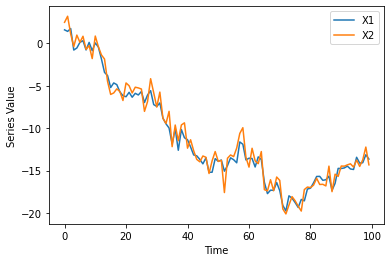

In [19]:
plt.plot(X1)
plt.plot(X2)
plt.xlabel('Time')
plt.ylabel('Series Value')
plt.legend([X1.name, X2.name])
plt.show()

Because $X_2$ is just an $I(1)$ series plus some stationary noise, it should still be $I(1)$. Let's check this.

In [20]:
Z = X2.diff()[1:]
Z.name = 'Z'

check_for_stationarity(Z);

p-value = 4.650742788247052e-18 The series Z is likely stationary.


Looks good. Now to show cointegration we'll need to find some linear combination of $X_1$ and $X_2$ that is stationary. We can take $X_2-X_1$. All that's left over should be stationary noise by design. Let's check this.

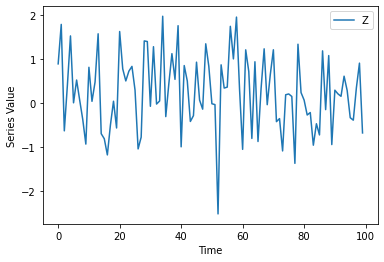

p-value = 5.933610353873095e-18 The series Z is likely stationary.


In [21]:
Z = X2 - X1
Z.name = 'Z'

plt.plot(Z)
plt.xlabel('Time')
plt.ylabel('Series Value')
plt.legend(['Z'])
plt.show()

check_for_stationarity(Z);

### Testing for Cointegration

There are a bunch of ways to test for cointegration. This [wikipedia article](https://en.wikipedia.org/wiki/Cointegration) describes some. In general we're just trying to solve for the coefficients $b_1, \dots b_k$ that will produce an $I(0)$ linear combination. If our best guess for these coefficients does not pass a stationarity check, then we reject the hypothesis that the set is cointegrated. This will lead to risk of Type II errors (false negatives), as we will not exhaustively test for stationarity on all coefficent combinations. However Type II errors are generally okay here, as they are safe and do not lead to us making any wrong forecasts.

In practice a common way to do this for pairs of time series is to use linear regression to estimate $\beta$ in the following model.

$$X_2 = \alpha + \beta X_1 + \epsilon$$

The idea is that if the two are cointegrated we can remove $X_2$'s depedency on $X_1$, leaving behind stationary noise. The combination $X_2 - \beta X_1 = \alpha + \epsilon$ should be stationary.

Let's try on some real data. We'll get prices and plot them first.

In [22]:
startDateStr = '2011/01/01'
endDateStr = '2017/01/01'
cachedFolderName = '../data/'
dataSetId = 'Data'
instrumentIds = ['MSFT','ADBE']
ds = YahooStockDataSource(cachedFolderName=cachedFolderName,
                            dataSetId=dataSetId,
                            instrumentIds=instrumentIds,
                            startDateStr=startDateStr,
                            endDateStr=endDateStr,
                            event='history')
data = ds.getBookDataByFeature()['adjClose']


Processing data for stock: MSFT
Processing data for stock: ADBE
20% done...
40% done...
60% done...
80% done...


In [23]:
X1 = data['MSFT']
X2 = data['ADBE']

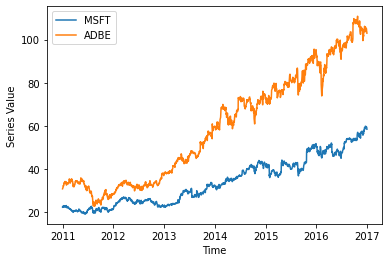

In [24]:
plt.plot(X1)
plt.plot(X2)
plt.xlabel('Time')
plt.ylabel('Series Value')
plt.legend([X1.name, X2.name])
plt.show()

Now use linear regression to compute $\beta$.

In [25]:
X1 = sm.add_constant(X1)
results = sm.OLS(X2, X1).fit()

# Get rid of the constant column
X1 = X1['MSFT']

results.params

const   -17.409094
MSFT      2.249762
dtype: float64

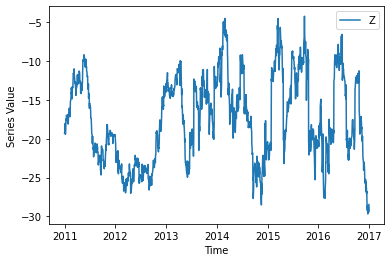

p-value = 0.004879421687753894 The series Z is likely stationary.


In [26]:
b = results.params['MSFT']
Z = X2 - b * X1
Z.name = 'Z'

plt.plot(Z.index, Z.values)
plt.xlabel('Time')
plt.ylabel('Series Value')
plt.legend([Z.name])
plt.show()

check_for_stationarity(Z);

We can see here that the resulting $Z$ was likely stationary over the time frame we looked at. This causes us to accept the hypothesis that our two assets were cointegrated over the same timeframe.

**This is only a forecast!**

Remember as with anything else, you should not assume that because some set of assets have passed a cointegration test historically, they will continue to remain cointegrated. You need to verify that consistent behavior occurs, and use various model validation techniques as you would with any model.

One of the most important things done in finance is to make many independent bets. Here a quant would find many pairs of assets they hypothesize are cointegrated, and evenly distribute their dollars between them in bets. This only requires more than half of the asset pairs to remain cointegrated for the strategy to work. 

Luckily there are some pre-built tests for cointegration. Here's one. Read up on the [documentation](http://statsmodels.sourceforge.net/devel/_modules/statsmodels/tsa/stattools.html) on your own time.

In [27]:
from statsmodels.tsa.stattools import coint

coint(X1, X2)

(-3.560785839955279,
 0.02737402244737853,
 array([-3.90370762, -3.34017942, -3.04725993]))

---
---

# 4. Todays Objective: processed dataset for our next lecture <a id="15"></a>

1. Get the Data from your preferred Stock,
2. Transform the Dataframe as you wish (e.g. Dollar bars),
3. Run necessary tests (ADF, etc)
4. Finally save the Dataframe in a different Format: Feather Pd

#### Why feather?

Feather is a portable file format for storing Arrow tables or data frames that utilizes the Arrow IPC format internally. Feather was created early in the Arrow project as a proof of concept for fast, language-agnostic data frame storage for Python (pandas) and R.

- It’s a lightweight, minimal API, so it can push data frames in and out as soon as possible
- It is language agnostic, which means that Feather files are the same regardless if written in Python or R, and can be read and written in other languages as well
- It has high read and write performance

Installation:

```js
pip install feather-format
```

The `pyarrow.feather` module contains the read and write functions for the format. `write_feather()` accepts either a `Table` or `pandas.DataFrame` object:

```js
import feather
feather.write_feather(df, '/path/to/file')
```


`read_feather()` reads a Feather file as a `pandas.DataFrame`. `read_table()` reads a Feather file as a `Table`. Internally, `read_feather()` simply calls `read_table()` and the result is converted to pandas:

```js
#Result is pandas.DataFrame
read_df = feather.read_feather('/path/to/file')

#Result is pyarrow.Table
read_arrow = feather.read_table('/path/to/file')
```


# 5. APPENDIX <a id="16"></a>

<details>
    
<summary>Click to expand!</summary>
    
  1. <a href="#19">Measures of centrality</a>     
  1. <a href="#20">Measures of Dispersion </a>      
  1. <a href="#21">Covariance and Correlation</a>     
  1. <a href="#22">Confidence Intervals</a>     
  1. <a href="#23">Hypothesis Testing</a>     
  1. <a href="#24">AR, MA, ARIMA, ARCH and GARCH</a>     
  1. <a href="#18">Introduction to Python and NumPy </a>     
    
</details>

## A. Statistics 101 <a id="17"></a>

### Measures of centrality <a id="19"></a>

#### Expected Value and Arithmetic mean

The expected value of a random variable is the probability-weighted average of all possible values.
When these probabilities are equal, the expected value is the same as arithmetic mean, defined as the sum of the observations divided by the number of observations:
$$\mu = \frac{\sum_{i=1}^N X_i}{N}$$

where $X_1, X_2, \ldots , X_N$ are our observations.

For example, if a dice is rolled repeatedly many times, we expect all numbers from 1 - 6 to show up an equal number of times. So the expected value in rolling a six-sided die is 3.5.


When the probabilities of different observations are not equal, i.e a random variable $X$ can take value $X_1$ with probability $p_1$, $X_2$ with probability $p_2$, and so on, the expected value of X is the same as <i>weighted</i> arithmetic mean.
The weighted arithmetic mean is defined as
$$\sum_{i=1}^n p_i X_i $$

where $\sum_{i=1}^n p_i = 1$

Therefore, the expected value is the average of all values obtained you perform the experiment it represents many times. This follows from the law of large numbers - the average of the results obtained from a large number of repetitions of an experiment should be close to the expected value, and will tend to become closer as more trials are performed.

#### Some properties of expected values that are handy:
* The expected value of a constant is equal to the constant itself $E[c] = c$
* The expected value is linear, i.e $E[aX+bY] = aE[X]+bE[Y]$ 
* If $X \leq Y$ , then $E[X] \leq E[Y]$
* The expected value not multiplicative, i.e. $E[XY]$ is not necessarily equal to $E[X]E[Y]$. 
  The amount by which they differ is called the covariance, covered in a later notebook.
  $Cov(X,Y)=E[XY]-E[X]E[Y]$
  If X and Y are uncorrelated, $Cov(X,Y)=0$

e.g. np.mean(x)

#### Other measures of centrality that are commonly used are:

#### Median

Number which appears in the middle of the list when it is sorted in increasing or decreasing order, i.e. the value in $(n+1)/2$ when $n$ is odd and the average of the values in $n/2$ and $(n+2)/2$ positions when $n$ is even. One advantage of using median in describing data compared to the mean is that it is not skewed so much by extremely large or small values

The median uses the value that splits the data set in half, but not how much smaller or larger the other values are.
e.g. np.median(x)

#### Mode

Most frequently occuring value in a data set. The mode of a probability distribution is the value x at which its probability distribution function takes its maximum value.
e.g. stats.mode(x)

#### Geometric mean

It is the central tendency of a set of numbers by using the product of their values (as opposed to the arithmetic mean which uses their sum). The geometric mean is defined as the nth root of the product of n numbers:
$$ G = \sqrt[n]{X_1X_1\ldots X_n} $$

for observations $X_i \geq 0$. We can also rewrite it as an arithmetic mean using logarithms:
$$ \ln G = \frac{\sum_{i=1}^n \ln X_i}{n} $$

The geometric mean is always less than or equal to the arithmetic mean (when working with nonnegative observations), with equality only when all of the observations are the same.
e.g. stats.gmean(x)

If we have stocks returns $R_1, \ldots, R_T$ over different times, we use the geometric mean to calculate average return $R_G$ so that if the rate of return over the whole time period were constant and equal to $R_G$, the final price of the security would be the same as in the case of returns $R_1, \ldots, R_T$.
$$ R_G = \sqrt[T]{(1 + R_1)\ldots (1 + R_T)} - 1$$

#### Harmonic mean

The harmonic mean is less commonly used than the other types of means. It is defined as
$$ H = \frac{n}{\sum_{i=1}^n \frac{1}{X_i}} $$

As with the geometric mean, we can rewrite the harmonic mean to look like an arithmetic mean. The reciprocal of the harmonic mean is the arithmetic mean of the reciprocals of the observations:
$$ \frac{1}{H} = \frac{\sum_{i=1}^n \frac{1}{X_i}}{n} $$

The harmonic mean for nonnegative numbers $X_i$ is always at most the geometric mean (which is at most the arithmetic mean), and they are equal only when all of the observations are equal.
The harmonic mean can be used when the data can be naturally phrased in terms of ratios. 

e.g. stats.gmean(x)

#### Point Estimates Can Be Deceiving

Means by nature hide a lot of information, as they collapse entire distributions into one number. As a result often 'point estimates' or metrics that use one number, can disguise large programs in your data. You should be careful to ensure that you are not losing key information by summarizing your data, and you should rarely, if ever, use a mean without also referring to a measure of spread.

#### Underlying Distribution Can be Wrong

Even when you are using the right metrics for mean and spread, they can make no sense if your underlying distribution is not what you think it is. For instance, using standard deviation to measure frequency of an event will usually assume normality. Try not to assume distributions unless you have to, in which case you should rigourously check that the data do fit the distribution you are assuming.

### Measures of Dispersion <a id="20"></a>

#### Range

Range is simply the difference between the maximum and minimum values in a dataset. Not surprisingly, it is very sensitive to outliers. We'll use `numpy`'s peak to peak (ptp) function for this.



#### Mean Absolute Deviation (MAD)

The mean absolute deviation is the average of the distances of observations from the arithmetic mean. We use the absolute value of the deviation, so that 5 above the mean and 5 below the mean both contribute 5, because otherwise the deviations always sum to 0.

$$ MAD = \frac{\sum_{i=1}^n |X_i - \mu|}{n} $$

where $n$ is the number of observations and $\mu$ is their mean.

#### Variance and standard deviation

Instead of using absolute deviations, we can use the squared deviations: **The variance** $\sigma^2$ is defined as the average of the squared deviations around the mean:
$$ \sigma^2 = \frac{\sum_{i=1}^n (X_i - \mu)^2}{n} $$

This is sometimes more convenient than the mean absolute deviation because absolute value is not differentiable, while squaring is smooth, and some optimization algorithms rely on differentiability.

**Standard deviation** is simply the square root of the variance, $\sigma$, and it is the easier of the two to interpret because it is in the same units as the observations.

Note that variance is additive while standard deviation is not.

One way to interpret standard deviation is by referring to Chebyshev's inequality. This tells us that the proportion of samples within $k$ standard deviations (that is, within a distance of $k \cdot$ standard deviation) of the mean is at least $1 - 1/k^2$ for all $k>1$.

#### Semivariance and semideviation

Although variance and standard deviation tell us how volatile a quantity is, they do not differentiate between deviations upward and deviations downward. Often, such as in the case of returns on an asset, we are more worried about deviations downward. This is addressed by semivariance and semideviation, which only count the observations that fall below the mean. Semivariance is defined as
$$ \frac{\sum_{X_i < \mu} (X_i - \mu)^2}{n_<} $$
where $n_<$ is the number of observations which are smaller than the mean. Semideviation is the square root of the semivariance.

A related notion is target semivariance (and target semideviation), where we average the distance from a target of values which fall below that target:
$$ \frac{\sum_{X_i < B} (X_i - B)^2}{n_{<B}} $$


Standard deviation indicates the amount of variation in a set of data values. A low standard deviation indicates that the data points tend to be close to the expected value, while a high standard deviation indicates that the data points are spread out over a wider range of values.
 
#### Some properties of standard deviation that are handy:

* The standard deviation of a constant is equal to 0
* Standard deviations cannot be added. Therefore, $\sigma(X+Y)\neq \sigma(X) + \sigma(Y)$
* However, variance, can be added. Infact, $\sigma^2(X+Y) = \sigma^2(X) + \sigma^2(Y) + Cov(X,Y)$
* If X and Y are uncorrelated,  $Cov(X,Y)=0$ and $\sigma^2(X+Y) = \sigma^2(X) + \sigma^2(Y)$

#### Volatility

If an experiment is performed daily and the results of an experiment on one day do not affect the on their results any other day, daily observation are uncorrelated. If we measure daily standard deviation as $\sigma_i$ then we can calculate the standard deviation for an year, also called annualized standard deviation as:
$$\sigma_{ann} = \sqrt{\sum_{i=1}^T \sigma_i^2}$$

In finance, we sum over all trading days and this annualized standard deviation is called **Volatility**.

#### Example: Sharpe ratio

One statistic often used to describe the performance of assets and portfolios is the Sharpe ratio, which measures the additional return per unit additional risk achieved by a portfolio, relative to a risk-free source of return such as Treasury bills:
$$R = \frac{E[r_a - r_b]}{\sqrt{Var(r_a - r_b)}}$$

where $r_a$ is the returns on our asset and $r_b$ is the risk-free rate of return.

#### These are Only Estimates

It is important to remember that when we are working with a subset of actual data, these computations will only give you sample statistics, that is mean and standard deviation of a sample of data. Whether or not this reflects the current true population mean and standard deviation is not always obvious, and more effort has to be put into determining that. This is especially problematic in finance because all data are time series and the mean and variance may change over time. In general do not assume that because something is true of your sample, it will remain true going forward.

---
---


### Covariance and Correlation <a id="21"></a>

#### Covariance

Covariance measures the extent to which the relationship between two variables is linear. The sign of the covariance shows the trend in the linear relationship between the variables, i.e if they tend to move together or in separate directions. A positive sign indicates that the variables are directly related, i.e. when one increases the other one also increases. A negative sign indicates that the variables are inversely related, so that when one increases the other decreases. It is calculated as
$$Cov(X,Y) = E[XY] - E[X]E[Y] = E[(X- E[X])(Y-E[Y])]$$

Note that
$$Cov(X,X) = E[X^2] - E[X]^2 = E[(X- E[X])^2] = \sigma^2 $$

When the two variables are identical, covariance is same as  variance.

##### Covariance isn't that meaningful by itself

What does this mean? To make better sense of data, we introduce correlation



### Correlation 


The correlation coefficient measures the extent to which the relationship between two variables is linear. Its value is always between -1 and 1. A positive coefficient indicates that the variables are directly related, i.e. when one increases the other one also increases. A negative coefficient indicates that the variables are inversely related, so that when one increases the other decreases. The closer to 0 the correlation coefficient is, the weaker the relationship between the variables.

The correlation coefficient of two series $X$ and $Y$ is defined as
$$r = \frac{Cov(X,Y)}{std(X)std(Y)}$$

So now what? What does this mean? Correlation uses information about the variance of X and Y to normalize this metric. Once we've normalized the metric to the -1 to 1 scale, we can make meaningful statements and compare correlations.

To see how this is done consider the formula.

$$\frac{Cov(X, Y)}{std(X)std(Y)}$$

$$= \frac{Cov(X, Y)}{\sqrt{var(X)}\sqrt{var(Y)}}$$

$$= \frac{Cov(X, Y)}{\sqrt{Cov(X, X)}\sqrt{Cov(Y, Y)}}$$

where $Cov$ is the covariance and $std$ is the standard deviation.

Two random sets of data will have a correlation coefficient close to 0:

#### Correlation vs. Covariance

Correlation is simply a normalized form of covariance. They are otherwise the same and are often used semi-interchangeably in everyday conversation. It is obviously important to be precise with language when discussing the two, but conceptually they are almost identical.

#### Covariance isn't that meaningful by itself

Let's say we have two variables $X$ and $Y$ and we take the covariance of the two.

#### Why do both `np.cov` and `np.corrcoef` return matrices?

The covariance matrix is an important concept in statistics. Often people will refer to the covariance of two variables $X$ and $Y$, but in reality that is just one entry in the covariance matrix of $X$ and $Y$. For each input variable we have one row and one column. The diagonal is just the variance of that variable, or $Cov(X, X)$, entries off the diagonal are covariances between different variables. The matrix is symmetric across the diagonal. Let's check that this is true.

#### How is this useful in finance?

#### Determining related assets

Once we've established that two series are probably related, we can use that in an effort to predict future values of the series. 

#### Constructing a portfolio of uncorrelated assets

Another reason that correlation is useful in finance is that uncorrelated assets produce the best portfolios. The intuition for this is that if the assets are uncorrelated, a drawdown in one will not correspond with a drawdown in another. This leads to a very stable return stream when many uncorrelated assets are combined.

#### Limitations

#### Significance

It's hard to rigorously determine whether or not a correlation is significant, especially when, as here, the variables are not normally distributed. Their correlation coefficient is close to 1, so it's pretty safe to say that the two stock prices are correlated over the time period we use, but is this indicative of future correlation? If we examine the correlation of each of them with the S&P 500, we see that it is also quite high. So, AAPL and LRCX are slightly more correlated with each other than with the average stock.

One fundamental problem is that it is easy to datamine correlations by picking the right time period. To avoid this, one should compute the correlation of two quantities over many historical time periods and examine the distibution of the correlation coefficient. More details on why single point estimates are bad will be covered in future lectures.

### Confidence Intervals <a id="22"></a>

We mentioned in the notebook on Expected Value and Standard Deviation that statistics derived from a sample (data available to us) may differ from true value (population statistic). For example, we want to measure the population mean, but we can only calculate a sample mean. We then want to use the sample mean to estimate the population mean. We use confidence intervals in an attempt to determine how accurately our sample mean estimates the population mean.

A confidence interval gives an estimated range of values between which the variable is likely to lie. This range is calculated from a given set of data or from a probability distribution
The selection of a confidence level for the interval determines the probability that the confidence interval will contain the value of the variable *over many computations*(read subtelty note below).
So, a 95% confidence interval for a variable states that the interval will contain the true population mean 95% of the time.

This still doesn't help, to really get a sense of how our sample mean relates to the population mean we need to compute a standard error. The standard error is a measure of the variance of the sample mean.

**IMPORTANT
Computing a standard error involves assuming that the way you sample is unbaised, and that the data are normal and independent. If these conditions are violated, your standard error will be wrong. There are ways of testing for this and correcting.**

The formula for standard error is.

$$SE = \frac{\sigma}{\sqrt{n}}$$

Where $\sigma$ is the sample standard deviation and $n$ is the number of samples.

Assuming our data are normally distributed, we can use the standard error to compute our confidence interval. 

To do this we set the desired confidence level (say 95%) and determine 95% of data lies within a range how many standard deviations of mean for our data's distribution. 

For example, for a normal distributiom, 95% of the observations lie in a range$[-1.96*SE,1.96*SE]$ around the mean. When the samples are large enough (generally > 30 is taken as a threshold) the Central Limit Theorem applies and normality can be safely assumed; if sample sizes are smaller, a safer approach is to use a $t$-distribution with appropriately specified degrees of freedom. The actual way to compute the values is by using a cumulative distribution function (CDF). If you need more background on Probability Distributions,  CDFs and inverse CDFs, read about them [here](https://en.wikipedia.org/wiki/Probability_density_function) and [here](https://en.wikipedia.org/wiki/Cumulative_distribution_function). Look [here](https://en.wikipedia.org/wiki/Student%27s_t-distribution) for information on the $t$-distribution. We can check the 95% number using one of the Python functions. 

NOTE: Be careful when applying the Central Limit Theorem, however, as many datasets in finance are fundamentally non-normal and it is not safe to apply the theorem casually or without attention to subtlety.

We can visualize the 95% mass bounds here.

Now, rather than reporting our sample mean without any sense of the probability of it being correct, we can compute an interval and be much more confident that the population mean lies in that interval. To do this we take our sample mean $\mu$ and report $\left(\mu-1.96 SE , \mu+1.96SE\right)$.

This works because assuming normality, that interval will contain the population mean 95% of the time.

#### SUBTLETY:
Note that it is incorrect to say that "The true mean lies in a range $\left(\mu-1.96 SE , \mu+1.96SE\right)$ with 95% probability," but unfortunately this is a very common misinterpretation. Rather, the 95% refers instead to the fact that over many computations of a 95% confidence interval, the true value will be in the interval in 95% of the cases (assuming correct calibration of the confidence interval, which we will discuss later). 

But in fact for a single sample and the single confidence interval computed from it, we have no way of assessing the probability that the interval contains the population mean. 

In the code below, we generate 100 95% Confidence Intervals around a mean of 0. Notice how for some of them, the mean lies completely outside the interval

Note that as your confidence increases, the interval necessarily widens.

#### What does this mean?

Confidence intervals allow us to set our desired confidence, and then report a range that will likely contain the population mean. The higher our desired confidence, the larger range we report. In general once can never report a single point value, because the probability that any given point is the true population mean is incredibly small. Let's see how our intervals tighten as we change sample size.

--- 
---

### Hypothesis Testing <a id="23"></a>

Statistical inference, the practice of making predictions about a large group based on smaller samples, is traditionally broken into two segments, **estimation** and **hypothesis testing**. Estimation provides values for specific things that you may be interested in, such as mean or variance, with a provided confidence interval. A confidence interval provides a region within which you can expect to find the true value of the parameter you estimated, as an estimation will almost never be exact. Confidence intervals use a set confidence level to choose how wide the interval should be, to achieve a higher confidence, we must report a wider interval.

For example, we might estimate a sample mean as $100$, with a confidence interval of $90, 110$ at a $95\%$ confidence level. This doesn't mean that the true population mean is between $90$ and $110$ with $95\%$ probability, as the true mean is a fixed value and the probability is $100\%$ or $0\%$ but we don't know which one. Instead what this means is that over many computations of a $95\%$ confidence interval assuming underlying assumptions about distributions hold, the population mean will be in the interval $95\%$ of the time.

This gives us an idea of the specific characteristics that an overall population may exhibit, given a sample. Hypothesis testing provides a different focus, detailing a framework for statistical testing of hypothesized values. By making an assertion of what a value should be, you create a testable hypothesis.

One thing to keep in mind is that statistical tests are designed such that if all the pre-requisite conditions are true, you should get the right answer about the data a certain percentage of the time. When you accept a hypothesis as true based on a test, that doesn't mean it's definitely true. It just means that you can know the probability you are wrong.

#### The Null and Alternative Hypothesis

The first thing we need to introduce is the null hypothesis, commonly written as $H_0$. The null hypothesis is the default case, generally reflecting the current common conception of the world. The alternative hypothesis is the one you are testing.

#### Examples

The alternative hypothesis $H_A$ is that you own more than 10 pairs of shoes.
The null hypothesis $H_0$ is that you do not own more than 10 pairs of shoes.

The alternative hypothesis $H_A$ is that eating pizza is related with obesity.
The null hypothesis $H_0$ is that it is not.

The alternative hypothesis $H_A$ is that microsoft's mean returns > 0.
The null hypothesis $H_0$ is that they <= 0.

#### Difficulty of Testing

Some hypotheses are easier to test than others. For instance the alternative hypothesis, "I own more than 10 pairs of shoes." and the accompanying null hypothesis that you do not, is easily tested by counting the number of pairs you own. However, you will still not get a perfect answer all the time in this case, as there may be measurement error in the counting, albiet quite small.

On the other hand, the hypothesis, "The number of insect species is greater than the number of stars in the universe." would be more difficult to test and require lots of data gathering.

#### Hypotheses Must be Testable

A hypothesis cannot be vague, otherwise how will it be tested. For example, "Momentum trading is a good way to make money." is not really testable. What does 'good' mean? What type of momentum trading are we discussing? Hypotheses should be very specific and the type of test needed should follow quickly from the hypothesis.

#### How to Perform Hypothesis Testing

The following are the main steps in hypothesis testing:

1. State the hypothesis and the alternative to the hypothesis
2. Identify the appropriate test statistic and its distribution. Ensure that any assumptions about the data are met (stationarity, normality, etc.)
3. Specify the significance level, $\alpha$
4. From $\alpha$ and the distribution compute the 'critical value'.
5. Collect the data and calculate the test statistic
6. Compare test statistic with critical value and decide whether to accept or reject the hypothesis.

First we state the hypothesis that we wish to test. We do this by identifying a **null hypothesis** and an **alternative hypothesis**. The null hypothesis, $H_0$, is the one that we want to test, while the alternative hypothesis, $H_A$, is the hypothesis that is accepted in the case where $H_0$ is rejected.

Let's say that we want to test whether the mean return of Microsoft stock is positive. The parameter that we are testing is denoted by $\theta$ and the proposed value of the parameter is denoted by $\theta_0$, which in this case is equal to $0$. So we say that our $H_0$ is $\theta = \theta_0$, that the returns are negative, and our $H_A$ is $\theta \neq \theta_0$. Including this formation, there are three possible ways to formulate null and alternative hypotheses:

1. $H_0: \theta = \theta_0$ versus $H_A: \theta \neq \theta_0$ (A "not equal to" alternative hypothesis)
2. $H_0: \theta \leq \theta_0$ versus $H_A: \theta > \theta_0$ (A "greater than" alternative hypothesis)
3. $H_0: \theta \geq \theta_0$ versus $H_A: \theta < \theta_0$ (A "less than" alternative hypothesis)

In this case, where we are testing the returns of MSFT, $\theta = \mu_{MSFT}$, representing the stock's mean returns. Since we are testing whether the returns are positive or negative, we have that $\theta_0 = 0$. Our example follows the first formulation of a hypothesis test. This is a **two-sided hypothesis test** (or **two-tailed hypothesis test**). The second and third formulations are examples of a **one-sided hypothesis test** (or **one-tailed hypothesis test**). With a one-sided test, we reject the null in favor of the alternative only if the data indivates that $\theta$ is repectively greater than or less than $\theta_0$. A two-sided test rejects the null in favor of the alternative if the data indicates that $\theta$ is either greater or less than $\theta_0$.

So if we were to write out our hypothesis for MSFT in more qualitative terms, we would have:

\begin{eqnarray}
H_0 &:& \text{The mean return on Microsoft stock is $0$}\\
H_A &:& \text{The mean return on Microsoft stock is not $0$}
\end{eqnarray}

When forming a hypothesis test, the null and alternative hypothesis must be complementary to each other. Between them they must cover all values of $\theta$. Regardless of the type of hypothesis test we are performing, we always test the null hypothesis as if $\theta = \theta_0$. In the case of either of the one-tailed tests, this will still provide more than enough evidence for us to make a decision. For example, if $H_0: \theta \leq 0$, $H_A: \theta > 0$, and we have enough evidence to reject $H_0: \theta = 0$ in favor of $H_A: \theta > 0$, then this holds true for all values less than $0$ as well.

The most common type of hypothesis test is the two-tailed, "not equal to", hypothesis test, because it presents a neutral view. The one-tailed hypothesis tests are less neutral than the "not equal to" test, reflecting the thoughts of the tester. One-tailed tests are often used to test "hoped for" results or results that the testers have a prior idea about.


Next, we identify the appropriate **test statistic** and its probability distribution. A test statistic usually takes the following form:

$$ \text{Test statistic} = \frac{\text{Sample statistic} - \text{Value of the population parameter under $H_0$ ($\theta_0$)}}{\text{Standard error of the sample statistic}} $$

A test statistic is calculated based on sample data and is compared to its probability distribution to determine whether to reject or not reject the null hypothesis. Since we are testing the mean return on MSFT stock, we can use the sample mean, $\bar{X}_\mu$, as our sample statistic. We calculate the standard error of the sample mean as $\sigma_{\bar{X}} = \frac{\sigma}{\sqrt{n}}$ if we know the standard deviation, $\sigma$, or as $s_{\bar{X}} = \frac{s}{\sqrt{n}}$, where $s$ is the sample standard deviation. So using these definitions, our test statistic can be calculated as:

$$ \frac{\bar{X}_\mu - \theta_0}{s_{\bar{X}}} = \frac{\bar{X}_\mu - 0}{s/\sqrt{n}} $$

The four most common distributions for test statistics are as follows:

* The $t$-distribution ($t$-test)
* The standard normal distribution ($z$-test)
* The chi-square ($\chi^2$) distribution ($\chi^2$-test)
* The $F$-distribution ($F$-test)

We will cover them in detail later. For now, we will say that we can use a $z$-test with our assumptions in the MSFT example.


After we identify the appropriate test statistic and probability distribution, we need to specify the **significance level** of the test, $\alpha$. The values that we compare our test statistic to in order to reject or fail to reject 
the $H_0$ are determined based on our $\alpha$ value. 

|| True Situation ||
| :---: | :---: | :---: |
| **Decision** | $H_0$ True | $H_0$ False |
| Do not reject $H_0$ | Correct Decision | Type II Error |
| Reject $H_0$ (accept $H_A$) | Type I Error | Correct Decision |

Our significance level is equal to the probability of a Type I error (a "false positive") occuring. The probability of a Type II error (a "false negative") occuring is denoted by $\beta$. If we try to decrease the probability of a Type I error occuring, we increase the probability of a Type II error occuring, resulting in a tradeoff. The only way to reduce the probability of both a Type I and a Type II error occuring is to increase the sample size.

The conventional significance levels are $0.1$, $0.05$, and $0.01$. Rejecting the null at $0.1$ mean that we have some evidence null is false, $0.05$ means we have strong evidence null is false, rejecting at $0.01$ we have very strong evidence that null is false.

#### Critical Value

Now we figure out our critical value, or, rejection point. The critical value for our test statistic is the value that we compare the test statistic to when deciding whether to reject the null hypothesis. If we reject the null, we say that the result is **statistically significant**, while if we fail to reject the null, we say that the result is **not statistically significant**.

We compare our test statistic to a **critical value** in order to decide whether to reject or not reject the null hypothesis. The critical value of a test is determined based on the $\alpha$ of our hypothesis test as well as the chosen distribution. In our case, say that $\alpha = 0.05$, so our significance level is $0.05$. With a one-sided $z$-test, there are two different ways to see the critical values:

* If we test $H_0$: $\theta \leq \theta_0$, $H_A$: $\theta > \theta_0$ at $\alpha = 0.05$, our critical value is $z_{0.05} = 1.645$. So we compare our test statistic and we reject the null hypothesis if $z > 1.645$.
* If we test $H_0$: $\theta \geq \theta_0$, $H_A$: $\theta < \theta_0$ at $\alpha = 0.05$, our critical value is $-z_{0.05} = -1.645$. As such, we compare our test statistic and we reject the null hypothesis if $z < -1.645$.

A two-sided test is a slightly different situation. Since it is two-sided, there are two rejection points, negative and positive. Our $\alpha$ is $0.05$, so the total probability of a Type I error must sum to $0.05$. As such, we split $0.05$ in half so that our two rejection points are $z_{0.025}$ and $-z_{0.025}$ for the positive and negative critical values, respectively. For a $z$-test, these values are $1.96$ and $-1.96$. Thus, we reject the null if $z < -1.96$ or if $z > 1.96$. If we find that $-1.96 \leq z \leq 1.96$, we fail to reject the null.

When conducting a hypothesis test, you can also use a **$p$-value** to determine the result. A $p$-value is the minimum level of significance where you can reject the null hypothesis. Often people will interpret $p$-values as the "probability that the null hypothesis is false", but this is misleading. A $p$-value only makes sense when compared to the significance value. If a $p$-value is less than $\alpha$, we reject the null and otherwise we do not. Lower $p$-values do not make something "more statistically significant". A lot of statistical outputs will calculate a $p$-value for you, but it is also possible to calculate it manually. The calculation depends both on your type of hypothesis test and the CDF of the distribution you are working with. To manually calculate a $p$-value, do the following:

* In a 'less than or equal to' hypothesis test, the $p$-value is $1 - CDF(\text{Test Statistic})$
* In a 'greater than or equal to' hypothesis test, the $p$-value is $CDF(\text{Test Statistic})$
* In a 'not equal to' hypothesis test, the $p$-value is $2 * 1 - CDF(|\text{Test Statistic}|)$

Significance values tie very nicely into confidence intervals, which are covered more in-depth in our confidence intervals lecture. A confidence interval provides us with an estimate for a parameter's possible range in values given a certain significance level. For example, if our $99\%$ confidence interval for the mean of MSFT returns was $(-0.0020, 0.0023)$, that would mean that there was a $99\%$ chance that the true value of the mean was within that interval.

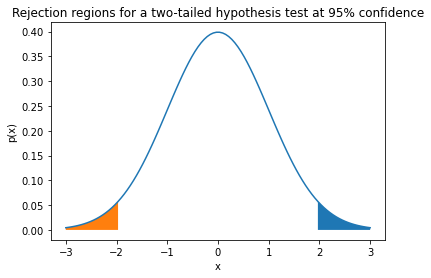

In [30]:
# Plot a standard normal distribution and mark the critical regions with shading
x = np.linspace(-3, 3, 100)
norm_pdf = lambda x: (1/np.sqrt(2 * np.pi)) * np.exp(-x * x / 2)
y = norm_pdf(x)

fig, ax = plt.subplots(1, 1, sharex=True)
ax.plot(x, y)
ax.fill_between(x, 0, y, where = x > 1.96)
ax.fill_between(x, 0, y, where = x < -1.96)
plt.title('Rejection regions for a two-tailed hypothesis test at 95% confidence')
plt.xlabel('x')
plt.ylabel('p(x)');

Now we collect the relevant data for our test and calculate the test statistic for a two sided, $5\%$ significance test. Keep in mind that any negative characteristics of the data will negatively affect our hypothesis test and possibly render it invalid. In the case of our test of MSFT returns, we may run into issues of time-period bias, or of look-ahead bias (if we prepare the test incorrectly). As always with historical data, the data that we work with may result in a specific test result that may not hold for the future. We also have to make sure that the data does not include any values that we would not have known during the time period we are testing (though this is more of an issue when comparing multiple things with hypothesis tests).

In order to make the statistical decision for the test, we compare our test statistic to our critical value. Our test statistic as stated above is between the two critical values for a 95% two-tailed $z$-test so in this example we **fail to reject** our $H_0$, our hypothesis that MSFT returns are **not** $0$.

#### Hypothesis Testing on Means

A $z$-distribution, or a standard normal distribution, is an essential probability distribution in finance. We like it when things are normally distributed because it entails many useful properties. On top of this, many fundamental methods require an assumption of normality in order to proceed. However, in most cases a $z$-distribution will be inappropriate for our data. We rarely know the true parameter values (mean and variance) of our data and must rely upon approximations. In these cases, we should use the $t$-distribution, and approximation of the normal distribution. The $t$-distribution is more forgiving when it comes to small sample sizes and is meant to be used with sample mean and variance. It has fatter tails and a lower peak, giving more flexibility compared to a normal distribution.

Both the $t$ and $z$-distributions rely upon an underlying assumption of normality, which is typically the case when we are analyzing financial data. As such, in addition to testing individual means, it makes sense to use them to compare between two or more mean values. We can use a hypothesis test to determine whether the means of several data-sets are statistically different from one another. Here, we will use a $t$-distribution to demonstrate. We will compare the mean returns of the S&P500 and Apple stock with a hypothesis test to see if the differences are statistically significant or not.

In [ ]:
symbol_list = ["SPY", "AAPL"]
start = '2015-01-01'
end = '2016-01-01'
pricing_sample = get_pricing(symbol_list, start_date = start, end_date = end, fields='price')
pricing_sample.columns = map(lambda x: x.symbol, pricing_sample.columns)
returns_sample = pricing_sample.pct_change()[1:]
returns_sample.plot()
plt.ylabel('Returns');

While these returns look to have the same mean, we still don't have enough evidence to say for sure. We use a hypothesis test to ground our suspicions in a statistical basis.

When comparing two means, our hypothesis tests are stated as the following:

1. $H_0: \mu_1 - \mu_2 = \theta_0, \ H_A: \mu_1 - \mu_2 \neq \theta_0$
2. $H_0: \mu_1 - \mu_2 \leq \theta_0, \ H_A: \mu_1 - \mu_2 > \theta_0$
3. $H_0: \mu_1 - \mu_2 \geq \theta_0, \ H_A: \mu_1 - \mu_2 < \theta_0$

Where $\mu_1, \mu_2$ are the respective means of SPY and AAPL and $\theta_0$ is the parameter we are testing. We will use the first hypothesis test to test the equality of the two returns. If we assume that the population variances are equal, our test statistic is calculated as:

$$ t = \frac{(\bar{X}_1 - \bar{X}_2) - (\mu_1 - \mu_2)}{(\frac{s_p^2}{n_1} + \frac{s_p^2}{n_2})^{1/2}} = \frac{\bar{X}_1 - \bar{X}_2}{(\frac{s_p^2}{n_1} + \frac{s_p^2}{n_2})^{1/2}}$$

With $s_p^2 = \frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2)}{n_1 + n_2 - 2}$ as the estimator of the common variance, known as the pooled variance, and $n_1 + n_2 - 2$ as the number of degrees of freedom ($n_1 - 1$ and $n_2 - 1$ for each dataset). A typical $t$-test on a mean assumes that all variances involved are equal with underlying normal distributions. If we are assuming that the variances are not equal, we have to calculate our test statistic differently. Our test statistic in this case is:

$$ t = \frac{(\bar{X}_1 - \bar{X}_2) - (\mu_1 - \mu_2)}{(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2})^{1/2}} = \frac{\bar{X}_1 - \bar{X}_2}{(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2})^{1/2}}$$

Where the number of degrees of freedom used to find the critical statistic is the modified degrees of freedom, the number of values that are free to vary, $df = \frac{(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2})^2}{\frac{(s_1^2/n_1)^2}{n_1} + \frac{(s_2^2/n_2)^2}{n_2}}$. This preserves the underlying normality of the data being tested while accounting for differing variances. Calculating the statistic this way removes a lot of problems that can occur if we have unequal variances, especially if the sample sizes of the underlying data differ as well. This specific case of a $t$-test is referred to as ["Welch's unequal variances $t$-test"](https://en.wikipedia.org/wiki/Welch%27s_t-test).

For this example, we are assuming that the variances of SPY and AAPL returns are different. We think that AAPL will be riskier than SPY so we will use the second formulation of the test statistic. Let's say that $\alpha = 0.05$ so we are computing a $95\%$ hypothesis test.

In [ ]:
# Sample mean values
mu_spy, mu_aapl = returns_sample.mean()
s_spy, s_aapl = returns_sample.std()
n_spy = len(returns_sample['SPY'])
n_aapl = len(returns_sample['AAPL'])

test_statistic = ((mu_spy - mu_aapl) - 0)/((s_spy**2/n_spy) + (s_aapl**2/n_aapl))**0.5
df = ((s_spy**2/n_spy) + (s_aapl**2/n_aapl))**2/(((s_spy**2 / n_spy)**2 /n_spy)+((s_aapl**2 / n_aapl)**2/n_aapl))

print 't test statistic: ', test_statistic
print 'Degrees of freedom (modified): ', df

Looking at a [t-table](https://en.wikipedia.org/wiki/Student%27s_t-distribution#Table_of_selected_values), we determine that the critical values for our two-sided hypothesis test are $-1.96$ and $1.96$.  Our test statistic is between these values so we **fail to reject** the null hypothesis and determine that the difference between SPY and AAPL returns is **not** significantly different from $0$.

#### Hypothesis Testing on Variances

If we want to test the variances of populations, we need to use a different distribution from the $t$ and $z$ distributions. Variances must by definition be greater than (or equal to) $0$ and fact that the distributions we have worked with up until now allow negative values makes them unviable as testing distributions. Risk is quantified in terms of standard deviations and variances so this method of hypothesis testing is a handy addition to our financial toolbox.

Instead of $t$ and $z$-distributions, we will be working with $\chi^2$ distributions for single variance tests and $F$ distributions for comparisons of variance. These distributions are bounded below by $0$, making them viable for testing in this manner.

Just like with all of our other hypothesis tests, tests of a single variance can take on three forms:

1. $H_0: \sigma^2 = \sigma_0^2, \ H_A: \sigma^2 \neq \sigma_0^2$
2. $H_0: \sigma^2 \leq \sigma_0^2, \ H_A: \sigma^2 > \sigma_0^2$
3. $H_0: \sigma^2 \geq \sigma_0^2, \ H_A: \sigma^2 < \sigma_0^2$

The $\chi^2$ distribution is a family of functions with each different formulation determined by the number of degrees of freedom. The shape of the distribution is different for every different value of the number of degrees of freedom, $k$.

In [ ]:
from scipy.stats import chi2

In [ ]:
# Here we show what a chi-square looks like
x = np.linspace(0, 8, 100)
y_1 = chi2.pdf(x, 1)
y_2 = chi2.pdf(x, 2)
y_3 = chi2.pdf(x, 3)
y_4 = chi2.pdf(x, 4)
y_6 = chi2.pdf(x, 6)
y_9 = chi2.pdf(x, 9)

fig, ax = plt.subplots()
ax.plot(x, y_1, label = 'k = 1')
ax.plot(x, y_2, label = 'k = 2')
ax.plot(x, y_3, label = 'k = 3')
ax.plot(x, y_4, label = 'k = 4')
ax.plot(x, y_6, label = 'k = 6')
ax.plot(x, y_9, label = 'k = 9')
ax.legend()
plt.title('Chi-Square distribution with k degrees of freedom')
plt.xlabel('x')
plt.ylabel('p(x)');

We calculate the $\chi^2$ test statistic as:

$$ \chi^2 = \frac{(n - 1)s^2}{\sigma_0^2} $$

Where $s^2$ is the sample variance and $n$ is the size of the dataset. The number of degrees of freedom is $n - 1$ and this is used in conjunction with the test statistic to determine the critical value(s) of our $\chi^2$ hypothesis test.

In [ ]:
startDateStr = '2018/01/01'
endDateStr = '2020/01/01'
cachedFolderName = '../data/'
dataSetId = 'Data'
instrumentIds = ['MSFT']
ds = YahooStockDataSource(cachedFolderName=cachedFolderName,
                            dataSetId=dataSetId,
                            instrumentIds=instrumentIds,
                            startDateStr=startDateStr,
                            endDateStr=endDateStr,
                            event='history')
pricing_sample = ds.getBookDataByFeature()['adjClose']

returns_sample = pricing_sample.pct_change()[1:]
plt.plot(returns_sample.index, returns_sample.values)
plt.ylabel('Returns');

Now we will use a $\chi^2$-test to test the value of the variance of Microsoft stock. Let's say that we want to use $\alpha = 0.01$ to test whether the variance of MSFT is less than or equal to $0.0001$ (that the standard deviation, or risk, is less than or equal to $0.01$).

$$ H_0: \sigma^2 \leq 0.0001, \ H_A: \sigma^2 > 0.0001 $$

So now we calculate our test statistic:

In [ ]:
test_statistic = (len(returns_sample) - 1) * returns_sample.std()**2 / 0.0001
print ('Chi-square test statistic: ', test_statistic)

In [ ]:
# Here we calculate the critical value directly because our df is too high for most chisquare tables
crit_value = chi2.ppf(0.99, len(returns_sample) - 1)
print ('Critical value at a = 0.01 with 251 df: ', crit_value)

Because we are using the 'less than or equal to' formulation of a one-sided hypothesis test, we reject the null hypothesis if our test statistic is greater than the critical value. Since $805.372 > 304.940$, we **reject** the null hypothesis in favor of the alternative and assert that $\sigma^2 > 0.0001$.

#### Comparing  Two Variances

We can compare the variances of two separate things using the $F$ distribution. When constructing a comparison of 
variances using an $F$-test, the hypothesis formulations are (in case you don't feel like scrolling up):

1. $H_0: \sigma_1^2 = \sigma_2^2, \ H_A: \sigma_1^2 \neq \sigma_2^2$
2. $H_0: \sigma_1^2 \leq \sigma_2^2, \ H_A: \sigma_1^2 > \sigma_2^2$
3. $H_0: \sigma_1^2 \geq \sigma_2^2, \ H_A: \sigma_1^2 < \sigma_2^2$

The $F$ distribution is similar to the $\chi^2$ distribution in that it is asymmetrical and bounded below by $0$. The $F$ distribution is defined with two different values of degrees of freedom. For the purposes of hypothesis testing, each one correlates to one of the factors that we are comparing. An $F$ distribution can be constructed from two separate $\chi^2$ distributions. $X$ is a $F$ random variable if it can be written as $X = \frac{Y_1/d_1}{Y_2/d_2}$, where $Y_1$ and $Y_2$ are $\chi^2$ random variables with degrees of freedom $d_1$ and $d_2$, respectively.

The an $F$ random variable is essentially a ratio of variances. Consequently, constructing the $F$ test statistic is done by taking the ratio of the sample variances of the data that we want to test. We can simply choose $\sigma_1^2$ and $\sigma_2^2$ to represent either of the variances that we are comparing in order so that our F-statistic is greater than $1$. 

$$ F = \frac{s_1^2}{s_2^2} $$

Let's compare SPY and AAPL to see whether their variances are the same (a 'not equal to' hypothesis test). We will use a $\alpha = 0.05$ test. Recall that for a two-sided test, we calculate the lower and upper critical values using values of $\alpha/2$. We gather the data and calculate the test statistic.

In [ ]:
startDateStr = '2018/01/01'
endDateStr = '2020/01/01'
cachedFolderName = '../data/'
dataSetId = 'Data'
instrumentIds = ['SPY', 'AAPL']
ds = YahooStockDataSource(cachedFolderName=cachedFolderName,
                            dataSetId=dataSetId,
                            instrumentIds=instrumentIds,
                            startDateStr=startDateStr,
                            endDateStr=endDateStr,
                            event='history')
pricing_sample = ds.getBookDataByFeature()['adjClose']

pricing_sample.columns = map(lambda x: x.symbol, pricing_sample.columns)
returns_sample = pricing_sample.pct_change()[1:]

In [ ]:
# Take returns from above, AAPL and SPY, and compare their variances
spy_std_dev, aapl_std_dev = returns_sample.std()
print ('SPY standard deviation is: ', spy_std_dev)
print ('AAPL standard deviation is: ', aapl_std_dev)

Note that the standard deviation of AAPL is greater than the standard deviation of SPY. As a result we choose $\sigma_1^2$ to represent the variance of AAPL and $\sigma_2^2$ to represent the variance of SPY.

In [ ]:
test_statistic = (aapl_std_dev / spy_std_dev)**2
print ("F Test statistic: ", test_statistic)

In [ ]:
# Since these values are taken over the same time period, they will have the same number of degrees of freedom
df1 = len(returns_sample['AAPL']) - 1
df2 = len(returns_sample['SPY']) - 1

print ('Degrees of freedom for SPY: ', df2)
print ('Degrees of freedom for AAPL: ', df1)

In [ ]:
from scipy.stats import f

In [ ]:
upper_crit_value = f.ppf(0.975, df1, df2)
lower_crit_value = f.ppf(0.025, df1, df2)
print ('Upper critical value at a = 0.05 with df1 = {0} and df2 = {1}: '.format(df1, df2), upper_crit_value)
print ('Lower critical value at a = 0.05 with df1 = {0} and df2 = {1}: '.format(df1, df2), lower_crit_value)

We see that our F-statistic value is greater than the upper critical value for our F test. Thus we **reject** the null hypothesis in favor of the alternative and conclude that the variances of AAPL and SPY indeed do differ.

---

### AR, MA, ARIMA, ARCH and GARCH <a id="24"></a>

#### Serial Correlation (Autocorrelation)

A time series model decomposes the series into three components: trend, seasonal/cyclical, and random. 

The random component is called the residual or error - the difference between our predicted value(s) and the observed value(s). Autocorrelation is when these residuals (errors) are correlated with each other. That is, if the error of the $i_{th}$ is dependent on errors of any of the terms $0 .. i-1$ before. Essentially, it tells us how sequential observations in a time series affect each other. 

Formally, for a covariance-stationary time series (as #3 above, where covariance between sequential observations is not a function of time), autocorrelation $\rho_k$ for lag $k$ (the number of time steps separating two sequantial observations), $$
\rho_k = \frac{COV(x_t, x_{t - k})}{\sigma_x^2} = \frac{E[(x_t - \mu)(x_{t - k} - \mu)}{\sigma_x^2}
$$

A significant value of $\rho_k$ indicates that the error of the $i_{th}$ is dependent on the previous k terms from ${i-k} .. {i-1}$.

#### Why Do We Care about Serial Correlation? 

Serial correlation is critical for the validity of our model predictions - The residuals (errors) of a stationary TS are serially uncorrelated by definition. It is critical we account for autocorrelation in our model otherwise the standard errors of our estimates for the parameters will be biased and underestimated, making any tests that we try to form using the model invalid In layman's terms, ignoring autocorrelation means we're likely to draw incorrect conclusions about the impact of the independent variables in our model.

#### Autoregressive Models of order p $AR(p)$

The autoregressive model is simply an extension of the random walk. It is essentially a regression model which depends linearly on the previous terms:
$$x_t = \alpha_1x_{t-1}+…+\alpha_px_{t-p}+w_t = \sum_{i=1}^{p} t_i\alpha_ix_{t-i}+w_t$$

This is an AR model of order "p",where $p$ represents the number of previous (or lagged) terms used within the model, $\alpha_i$ is the coefficient, and $w_t$ is a white noise term. Note that an AR(1) model with $\alpha_1$ set equal to 1 is a random walk!

One of the most important aspects of the AR(p) model is that it is not always stationary. The stationarity of a particular model depends upon the parameters. For example, an AR(1) model with $\alpha_1$ = 1 is a random walk and therefore not stationary.

#### Moving Average Models - MA(q)

MA(q) models are very similar to AR(p) models. MA(q) model is a linear combination of past error terms as opposed to a linear combination of past observations like the AR(p) model. The motivation for the MA model is that we can explain "shocks" in the error process directly by fitting a model to the error terms. (In an AR(p) model these shocks are observed indirectly by using past observations) 

$$x_t=w_t+\beta_1w_{t-1}+…+\beta_qw_{t-q}$$ 

Where $w_t$ is white noise with $E(w_t)=0$ and variance $\sigma^2$

By definition, ACF $ρ_k$ should be zero for k>q.

#### Autoregressive Moving Average Models - ARMA(p, q)

ARMA model is simply the merger between AR(p) and MA(q) models:

* AR(p) models try to capture (explain) the momentum and mean reversion effects often observed in trading markets (market participant effects). 
* MA(q) models try to capture (explain) the shock effects observed in the white noise terms. These shock effects could be thought of as unexpected events affecting the observation process e.g. Surprise earnings, A terrorist attack, etc.

Hence, an ARMA model attempts to capture both of these aspects when modelling financial time series. Note that an ARMA model does not take into account volatility clustering, a key empirical phenomena of many financial time series which we will discuss later. 

$$x_t=\alpha_1x_{t-1}+…+\alpha_px_{t-p}+w_t+\beta_1w_{t-1}+…+\beta_qw_{t-q}$$ 

Where $w_t$ is white noise with $E(w_t)=0$ and variance $\sigma^2$

An ARMA model will often require fewer parameters than an AR(p) or MA(q) model alone. That is, it is redundant in its parameters

However, for trading purposes we just need to have a predictive power that exceeds chance and produces enough profit above transaction costs, in order to be profitable in the long run.

**So how do we decide the values of $p$ and $q$ ?**

We exapnd on the method described in previous sheet. To fit data to an ARMA model, we use the [Akaike Information Criterion (AIC)](https://en.wikipedia.org/wiki/Akaike_information_criterion) across a subset of values for p,q to find the model with minimum AIC and then apply the [Ljung-Box test](https://en.wikipedia.org/wiki/Ljung%E2%80%93Box_test) to determine if a good fit has been achieved, for particular values of p,q. If the p value of the test is greater the required significance, we can conclude that the residuals are independent and white noise.

#### Autoregressive Integrated Moving Average Models - ARIMA(p, d, q)

ARIMA is a natural extension to the class of ARMA models - they are used because they can reduce a non-stationary series to a stationary series using a sequence of differences. 

As previously mentioned many of our TS are not stationary, however they can be made stationary by differencing. We saw an example of this when we took the first difference of nonstationary Guassian random walk and proved that it equals stationary white noise.

ARIMA essentially performs same function, but does so repeatedly, $d$ times, in order to reduce a non-stationary series to a stationary one.

**Without diving too deeply into the equation, just know that a time series $x_t$ is integrated of order $d$ if we difference the series $d$ times and receive a discrete white noise series.**


A time series $x_t$ is an autoregressive integrated moving average model of order p, d, q, ARIMA(p,d,q) if the series $x_t$ is differenced $d$ times, and it then follows an ARMA(p,q) process.

#### Conditional Heteroskedasticity

The main motivation for studying conditional heteroskedasticity in finance is that of volatility of asset returns.

A collection of random variables is **heteroskedastic** if there are certain groups, or subsets, of variables within the larger set that have a different variance from the remaining variables.

In finance, an increase in variance maybe correlated to a further increase in variance. For instance, on a day that equities markets undergo a substantial drop, automated risk management sell orders in long only portfolios get triggered, which lead to further fall in the price of equities within these portfolios, leading to significant downward volatility.

These "sell-off" periods, as well as many other forms of volatility, lead to heteroskedasticity that is serially correlated and hence conditional on periods of increased variance. Thus we say that such series are conditional heteroskedastic.

One of the challenging aspects of conditional heteroskedastic series is ACF plots of a series with volatility might still appear to be a realisation of stationary discrete white noise. This is despite the fact that the series is most definitely non-stationary as its variance is not constant in time.

To incorporate CH in our model, we can create a model that utilises an autoregressive process for the variance itself - a model that actually accounts for the changes in the variance over time using past values of the variance.

This is the basis of the Autoregressive Conditional Heteroskedastic (ARCH) model.


#### Autoregressive Conditionally Heteroskedastic Models - ARCH(p)

ARCH(p) models can be thought of as simply an AR(p) model applied to the variance of a time series.

$$Var(\epsilon_t) = \alpha_0 + \alpha_1Var(\epsilon_{t-1})+…+\alpha_pVar(\epsilon_{t-p})+w_t$$

The actual time series is given by:

$$\epsilon_t = w_t\sqrt{\alpha_0 + \alpha_1\epsilon_{t-1}^2+…+\alpha_p\epsilon_{t-p}^2}$$

For ARCH(1), this reads:
$$\epsilon_t = w_t\sqrt{\alpha_0+\alpha_1\epsilon_{t-1}^2}$$

#### When To Apply ARCH(p)?

When we were attempting to fit an AR(p) model and are concerned with the decay of the $p$ lag on a ACF plot of the series, we can apply the same logic to the square of the residuals. If we find that we can apply an AR(p) to these square residuals then we have an indication that an ARCH(p) process may be appropriate.

**Note that ARCH(p) should only ever be applied to a series that has already had an appropriate model fitted sufficient to leave the residuals looking like discrete white noise**. Since we can only tell whether ARCH is appropriate or not by squaring the residuals and examining the ACF, we also need to ensure that the mean of the residuals is zero.

ARCH should only ever be applied to series that do not have any trends or seasonal effects, i.e. that has no (evident) serially correlation. ARIMA is often applied to such a series, at which point ARCH may be a good fit.



#### Generalized Autoregressive Conditionally Heteroskedastic Models - GARCH(p,q)

GARCH(p, q)  is an ARMA model applied to the variance of a time series i.e., it has an autoregressive term and a moving average term. The AR(p) models the variance of the residuals (squared errors) or simply our time series squared. The MA(q) portion models the variance of the process.

$$\epsilon_t = \sigma_t w_t$$

Where $w_t$ is discrete white noise, with zero mean and unit variance, and $\sigma^2$ is given by:

$$\sigma_t^2=\alpha_0+\sum_{i=1}^{p}\alpha_i\epsilon_{t-i}^2+\sum_{j=1}^{q}\beta_j\sigma_{t-j}^2$$

Where $\alpha_i$ and $\beta_j$ are parameters of the model.For GARCH(1,1), $\sigma^2$ is:

$$\sigma_t^2=\alpha_0+\alpha_1\epsilon_{t-1}^2+\beta_1\sigma_{t-1}^2$$

$\alpha_1 + \beta_1$ must be less than 1 or the model is unstable. We can simulate a GARCH(1, 1) process below.

#### Maximum Likelihood Estimator for GARCH Parameters

Now we'll define functions that, given our data, will compute the MLE for the $\mu$ and $\sigma$ parameters of the normal distribution.

Recall that

$$\hat\mu = \frac{1}{T}\sum_{t=1}^{T} x_t$$

$$\hat\sigma = \sqrt{\frac{1}{T}\sum_{t=1}^{T}{(x_t - \hat\mu)^2}}$$

#### Exponential Distribution


`numpy` defines the exponential distribution as
$$\frac{1}{\lambda}e^{-\frac{x}{\lambda}}$$

So we need to invert the MLE from the lecture notes. There it is

$$\hat\lambda = \frac{T}{\sum_{t=1}^{T} x_t}$$


--- 
--- 


## B. Python 101 <a id="18"></a>

NumPy is an incredibly powerful package in Python. It has strong integration with Pandas, another tool we will be covering in the lecture series. NumPy adds support for multi-dimensional arrays and mathematical functions that allow you to easily perform linear algebra calculations. This lecture will be a collection of linear algebra examples computed using NumPy.

### Basic NumPy arrays

The most basic way that we could make use of NumPy in finance is calculating the mean return of a portfolio. Say that we have a list containing the historical return of several stocks.

In [34]:
stock_list = [3.5, 5, 2, 8, 4.2]

We can make an array by calling a function on the list:

In [43]:
returns = np.array(stock_list)
returns, type(returns)

(array([3.5, 5. , 2. , 8. , 4.2]), numpy.ndarray)

You'll notice that the type of our array is 'ndarray', not just 'array'. This is because NumPy arrays can be created with multiple dimensions. If we pass np.array() a list of lists, it will create a 2-dimensional array. If we pass a list of lists of lists, it will create a 3-dimensional array, and so on and so forth.

In [44]:
A = np.array([[1, 2], [3, 4]])
A, type(A)

(array([[1, 2],
        [3, 4]]),
 numpy.ndarray)

We can access the dimensions of an array by looking at its `shape` member variable.

In [45]:
A.shape

(2, 2)

Arrays are indexed in much the same way as lists in Python. Elements of a list begin indexing from $0$ and end at $n - 1$, where $n$ is the length of the array.

In [46]:
returns[0], returns[len(returns) - 1]

(3.5, 4.2)

We can take a slice of an array using a colon, just like in a list.

In [47]:
returns[1:3]

array([5., 2.])

A slice of an array, like in a list, will select a group of elements in the array starting from the first element indicated and going up to (but not including) the last element indicated.

In the case of multidimensional arrays, many of the same conventions with slicing and indexing hold. We can access the first column of a 2-dimensional array like so:

In [48]:
A[:, 0]

array([1, 3])

And the first row of a 2-dimensional array like so:

In [49]:
A[0, :]

array([1, 2])

Notice that each slice of the array returns yet another array!

In [50]:
type(A[0,:])

numpy.ndarray

Passing only one index to a 2-dimensional array will result in returning the row with the given index as well, providing us with another way to access individual rows.

In [51]:
A[0]

array([1, 2])

Accessing the index of an individual element will return only the element.

In [52]:
A[1, 1]

4

#### Array functions

Functions built into NumPy can be easily called on arrays. Most functions are applied to an array element-wise (as scalar multiplication is). For example, if we call `log()` on an array, the logarithm will be taken of each element.

In [53]:
np.log(returns)

array([1.25276297, 1.60943791, 0.69314718, 2.07944154, 1.43508453])

Some functions return a single value. This is because they treat the array as a collection (similar to a list), performing the designated function. For example, the `mean()` function will do exactly what you expect, calculating the mean of an array.

In [54]:
np.mean(returns)

4.54

Or the `max()` function will return the maximum element of an array.

In [55]:
np.max(returns)

8.0

For further reading on the universal functions in NumPy, check out the [documentation](https://docs.scipy.org/doc/numpy/user/quickstart.html#universal-functions).

### Return to the returns

Now let's modify our returns array with scalar values. If we add a scalar value to an array it will be added to every element of the array. If we multiply an array by a scalar value it will be multiplied against every element of the array. If we do both, both will happen!

In [56]:
returns*2 + 5

array([12. , 15. ,  9. , 21. , 13.4])

NumPy also has functions specifically built to operate on arrays. Let's take the mean and standard deviation of this group of returns.

In [58]:
"Mean: ", np.mean(returns), "Std Dev: ", np.std(returns)

('Mean: ', 4.54, 'Std Dev: ', 1.9915822855207364)

Let's simulate a universe of stocks using NumPy's functions. First we need to create the arrays to hold the assets and returns that we will use to build a portfolio. This is because arrays are created with a fixed size. Their dimensions can't be changed without creating a new array.

In [59]:
N = 10
assets = np.zeros((N, 100))
returns = np.zeros((N, 100))

This function, `zeroes()`, creates a NumPy array with the given dimensions that is entirely filled in with $0$. We can pass a single value or a tuple of as many dimensions as we like. Passing in the tuple `(N, 100)`, will return a two-dimensional array with $N$ rows and $100$ columns. Our result is a $N \times 100$ array.

Now we will simulate a base asset. We want the universe of stocks to be correlated with each other so we will use this initial value to generate the others.

In [60]:
R_1 = np.random.normal(1.01, 0.03, 100)
returns[0] = R_1
assets[0] = np.cumprod(R_1)

The `random` module in NumPy is exceedingly useful. It contains methods for sampling from many different probability distributions. In this case we draw $N = 100$ random samples from a normal distribution with mean $1.01$ and standard deviation $0.03$. We treat these as the daily percentage returns of our asset and take the cumulative product of these samples to get the current price.

The way we have generated our universe, the the individual $R_i$ vectors are each 1-dimensional arrays and the `returns` and `assets` variables contain 2-dimensional arrays. Above, we set the initial row of both `returns` and `assets` to be the first $R_i$ vector and the cumulative asset price based on those returns, respectively.

We will now use this base asset to create a few other random assets that are correlated with it.

In [61]:
# Generate assets that are correlated with R_1
for i in range(1, N):
    R_i = R_1 + np.random.normal(0.001, 0.02, 100)
    returns[i] = R_i # Set each row of returns equal to the new R_i array
    assets[i] = np.cumprod(R_i)
    
mean_returns = [(np.mean(R) - 1)*100 for R in returns]
return_volatilities = [np.std(R) for R in returns]

Here we generate the remaining $N - 1$ securities that we want in our universe by adding random noise to $R_1$. This ensures that our $N - 1$ other assets will be correlated with the base asset because they have some underlying information that is shared.

Let's plot what the mean return of each asset looks like:

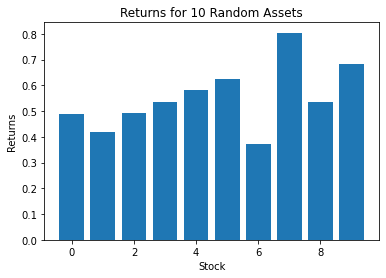

In [62]:
plt.bar(np.arange(len(mean_returns)), mean_returns)
plt.xlabel('Stock')
plt.ylabel('Returns')
plt.title('Returns for {0} Random Assets'.format(N));

### Calculating Expected Return

So we have a universe of stocks. Great! Now let's put them together in a portfolio and calculate its expected return and risk.

We will start off by generating $N$ random weights for each asset in our portfolio.

In [63]:
weights = np.random.uniform(0, 1, N)
weights = weights/np.sum(weights)

We have to rescale the weights so that they all add up to $1$. We do this by scaling the weights vector by the sum total of all the weights. This step ensures that we will be using $100\%$ of the portfolio's cash.

To calculate the mean return of the portfolio, we have to scale each asset's return by its designated weight. We can pull each element of each array and multiply them individually, but it's quicker to use NumPy's linear algebra methods. The function that we want is `dot()`. This will calculate the dot product between two arrays for us. So if $v = \left[ 1, 2, 3 \right]$ and $w = \left[4, 5, 6 \right]$, then:

$$ v \cdot w = 1 \times 4 + 2 \times 5 + 3 \times 6 $$

For a one-dimensional vector, the dot product will multiply each element pointwise and add all the products together! In our case, we have a vector of weights, $\omega = \left[ \omega_1, \omega_2, \dots \omega_N\right]$ and a vector of returns, $\mu = \left[ \mu_1, \mu_2, \dots, \mu_N\right]$. If we take the dot product of these two we will get:

$$ \omega \cdot \mu = \omega_1\mu_1 + \omega_2\mu_2 + \dots + \omega_N\mu_N = \mu_P $$

This yields the sum of all the asset returns scaled by their respective weights. This the the portfolio's overall expected return!

In [64]:
p_returns = np.dot(weights, mean_returns)
"Expected return of the portfolio: ", p_returns

('Expected return of the portfolio: ', 0.5694631673264614)

Calculating the mean return is fairly intuitive and does not require too much explanation of linear algebra. However, calculating the variance of our portfolio requires a bit more background.

#### Beware of NaN values

Most of the time, all of these calculations will work without an issue. However, when working with real data we run the risk of having `nan` values in our arrays. This is NumPy's way of saying that the data there is missing or doesn't exist. These `nan` values can lead to errors in mathematical calculations so it is important to be aware of whether your array contains `nan` values and to know how to drop them.

In [65]:
v = np.array([1, 2, np.nan, 4, 5])
v

array([ 1.,  2., nan,  4.,  5.])

Let's see what happens when we try to take the mean of this array.

In [66]:
np.mean(v)

nan

Clearly, `nan` values can have a large impact on our calculations. Fortunately, we can check for `nan` values with the `isnan()` function.

In [67]:
np.isnan(v)

array([False, False,  True, False, False])

Calling `isnan()` on an array will call the function on each value of the array, returning a value of `True` if the element is `nan` and `False` if the element is valid. Now, knowing whether your array contains `nan` values is all well and good, but how do we remove `nan`s? Handily enough, NumPy arrays can be indexed by boolean values (`True` or `False`). If we use a boolean array to index an array, we will remove all values of the array that register as `False` under the condition. We use the `isnan()` function in create a boolean array, assigning a `True` value to everything that is *not* `nan` and a `False` to the `nan`s and we use that to index the same array.

In [68]:
ix = ~np.isnan(v) # the ~ indicates a logical not, inverting the bools
v[ix] # We can also just write v = v[~np.isnan(v)]

array([1., 2., 4., 5.])

In [69]:
np.mean(v[ix])

3.0

There are a few shortcuts to this process in the form of NumPy functions specifically built to handle them, such as `nanmean()`.

In [70]:
np.nanmean(v)

3.0

The `nanmean()` function simply calculates the mean of the array as if there were no `nan` values at all! There are a few more of these functions, so feel free to read more about them in the [documentation](https://docs.scipy.org/doc/numpy/user/index.html). These indeterminate values are more an issue with data than linear algebra itself so it is helpful that there are ways to handle them.

### Conclusion

Linear algebra is pervasive in finance and in general. For example, the calculation of *optimal* weights according to modern portfolio theory is done using linear algebra techniques. The arrays and functions in NumPy allow us to handle these calculations in an intuitive way. For a quick intro to linear algebra and how to use NumPy to do more significant matrix calculations, proceed to the next section.

### A brief foray into linear algebra

Let's start with a basic overview of some linear algebra. Linear algebra comes down to the multiplication and composition of scalar and matrix values. A scalar value is just a real number that we multiply against an array. When we scale a matrix or array using a scalar, we multiply each individual element of that matrix or array by the scalar.

A matrix is a collection of values, typically represented by an $m \times n$ grid, where $m$ is the number of rows and $n$ is the number of columns. The edge lengths $m$ and $n$ do not necessarily have to be different. If we have $m = n$, we call this a square matrix. A particularly interesting case of a matrix is when $m = 1$ or $n = 1$. In this case we have a special case of a matrix that we call a vector. While there is a matrix object in NumPy we will be doing everything using NumPy arrays because they can have dimensions greater than $2$. For the purpose of this section, we will be using matrix and array interchangeably.

We can express the matrix equation as:

$$ y = A\cdot x $$

Where $A$ is an $m \times n$ matrix, $y$ is a $m \times 1$ vector, and $x$ is a $n \times 1$ vector. On the right-hand side of the equation we are multiplying a matrix by a vector. This requires a little bit more clarification, lest we think that we can go about multiplying any matrices by any other matrices.

#### Matrix multiplication

With matrix multiplication, the order in which the matrices are multiplied matters. Multiplying a matrix on the left side by another matrix may be just fine, but multiplying on the right may be undefined.

In [71]:
A = np.array([
        [1, 2, 3, 12, 6],
        [4, 5, 6, 15, 20],
        [7, 8, 9, 10, 10]        
    ])
B = np.array([
        [4, 4, 2],
        [2, 3, 1],
        [6, 5, 8],
        [9, 9, 9]
    ])

Notice that the above-defined matrices, $A$ and $B$, have different dimensions. $A$ is $3 \times 5$ and $B$ is $4 \times 3$. The general rule of what can and cannot be multiplied in which order is based on the dimensions of the matrices. Specifically, the number of columns in the matrix on the left must be equal to the number of rows in the matrix on the right. In super informal terms, let's say that we have an $m \times n$ matrix and a $p \times q$ matrix. If we multiply the first by the second on the right, we get the following:

$$ (m \times n) \cdot (p \times q) = (m \times q) $$

So the resultant product has the same number of rows as the left matrix and the same number of columns as the right matrix. This limitation of matrix multiplication with regards to dimensions is important to keep track of when writing code. To demonstrate this, we use the `dot()` function to multiply our matrices below:

In [72]:
np.dot(A, B)

ValueError: shapes (3,5) and (4,3) not aligned: 5 (dim 1) != 4 (dim 0)

These results make sense in accordance with our rule. Multiplying a $3 \times 5$ matrix on the right by a $4 \times 3$ matrix results in an error while multiplying a $4 \times 3$ matrix on the right by a $3 \times 5$ matrix results in a $4 \times 5$ matrix.

In [73]:
np.dot(B, A)

array([[ 34,  44,  54, 128, 124],
       [ 21,  27,  33,  79,  82],
       [ 82, 101, 120, 227, 216],
       [108, 135, 162, 333, 324]])

### Portfolio Variance

Let's return to our portfolio example from before. We calculated the expected return of the portfolio, but how do we calculate the variance? We start by trying to evaluate the portfolio as a sum of each individual asset, scaled by it's weight.

$$ VAR[P] = VAR[\omega_1 S_1 + \omega_2 S_2 + \cdots + \omega_N S_N] $$

Where $S_0, \cdots, S_N$ are the assets contained within our universe. If all of our assets were independent of each other, we could simply evaluate this as

$$ VAR[P] = VAR[\omega_1 S_1] + VAR[\omega_2 S_2] + \cdots + VAR[\omega_N S_N] = \omega_1^2\sigma_1^2 + \omega_2^2\sigma_2^2 + \cdots + \omega_N^2\sigma_N^2 $$

However, all of our assets depend on each other by their construction. They are all in some way related to our base asset and therefore each other. We thus have to calculate the variance of the portfolio by including the individual pairwise covariances of each asset. Our formula for the variance of the portfolio:

$$ VAR[P] = \sigma_P^2 = \sum_i \omega_i^2\sigma_i^2 + \sum_i\sum_{i\neq j} \omega_i\omega_j\sigma_i\sigma_j\rho_{i, j}, \ i, j \in \lbrace 1, 2, \cdots, N \rbrace $$

Where $\rho_{i,j}$ is the correlation between $S_i$ and $S_j$, $\rho_{i, j} = \frac{COV[S_i, S_j]}{\sigma_i\sigma_j}$. This seems exceedingly complicated, but we can easily handle all of this using NumPy arrays. First, we calculate the covariance matrix that relates all the individual stocks in our universe.

In [74]:
cov_mat = np.cov(returns)
cov_mat

array([[0.00080905, 0.00083752, 0.00085338, 0.00090617, 0.00076682,
        0.00082214, 0.00075372, 0.00086543, 0.00089237, 0.00081354],
       [0.00083752, 0.00134663, 0.0009298 , 0.00093571, 0.00080606,
        0.00091294, 0.00074427, 0.00086173, 0.00096063, 0.0008281 ],
       [0.00085338, 0.0009298 , 0.00133339, 0.0008916 , 0.00086282,
        0.00086378, 0.00078351, 0.00094801, 0.00098392, 0.00085677],
       [0.00090617, 0.00093571, 0.0008916 , 0.00147592, 0.0008499 ,
        0.00090502, 0.00084586, 0.00088937, 0.00099854, 0.00091173],
       [0.00076682, 0.00080606, 0.00086282, 0.0008499 , 0.00111557,
        0.00079018, 0.00072919, 0.00074994, 0.00087912, 0.00080817],
       [0.00082214, 0.00091294, 0.00086378, 0.00090502, 0.00079018,
        0.00121687, 0.00071384, 0.00093166, 0.00098594, 0.00089137],
       [0.00075372, 0.00074427, 0.00078351, 0.00084586, 0.00072919,
        0.00071384, 0.00112934, 0.00084835, 0.00085534, 0.00075615],
       [0.00086543, 0.00086173, 0.0009480

This array is not formatted particularly nicely, but a covariance matrix is a very important concept. The covariance matrix is of the form:

$$ \left[\begin{matrix}
VAR[S_1] & COV[S_1, S_2] & \cdots & COV[S_1, S_N] \\
COV[S_2, S_1] & VAR[S_2] & \cdots & COV[S_2, S_N] \\
\vdots & \vdots & \ddots & \vdots \\
COV[S_N, S_1] & COV[S_N, S_2] & \cdots & VAR[S_N]
\end{matrix}\right] $$

So each diagonal entry is the variance of that asset at that index and each off-diagonal holds the covariance of two assets indexed by the column and row number. What is important is that once we have the covariance matrix we are able to do some very quick linear algebra to calculate the variance of the overall portfolio. We can represent the variance of the portfolio in array form as:

$$ \sigma_p^2 = \omega \ C \ \omega^\intercal$$

Where $C$ is the covariance matrix of all the assets and $\omega$ is the array containing the weights of each individual asset. The superscript $\intercal$ on the second $\omega$ listed above denotes the **transpose** of $\omega$. For a reference on the evaluation of the variance of a portfolio as a matrix equation, please see the Wikipedia article on [modern portfolio theory](https://en.wikipedia.org/wiki/Modern_portfolio_theory).

The transpose of an array is what you get when you switch the rows and columns of an array. This has the effect of reflecting an array across what you might imagine as a diagonal. For example, take our array $A$ from before:

In [75]:
A

array([[ 1,  2,  3, 12,  6],
       [ 4,  5,  6, 15, 20],
       [ 7,  8,  9, 10, 10]])

The transpose looks like a mirror image of the same array.

In [76]:
np.transpose(A)

array([[ 1,  4,  7],
       [ 2,  5,  8],
       [ 3,  6,  9],
       [12, 15, 10],
       [ 6, 20, 10]])

But $\omega$ here is a 1-dimensional array, a vector! It makes perfect to take the transpose of $A$, a $3 \times 5$ array, as the output will be a $5 \times 3$ array, but a 1-dimensional array is not quite as intuitive. A typical 1-dimensional array can be thought of as a $1 \times n$ horizontal vector. Thus, taking the tranpose of this array essentially means changing it into a $n \times 1$ vertical vector. This makes sense because 1-dimensional arrays are still arrays and any multiplication done between 1-dimensional and higher dimensional arrays must keep in line with our dimensionality issue of matrix multiplication.

To make a long story short, we think of $\omega$ as $1 \times N$ since we have $N$ securities. This makes it so that $\omega^\intercal$ is $N \times 1$. Again, our covariance matrix is $N \times N$. So the overall multiplication works out like so, in informal terms:

$$ \text{Dimensions}(\sigma_p^2) = \text{Dimensions}(\omega C \omega^\intercal) = (1 \times N)\cdot (N \times N)\cdot (N \times 1) = (1 \times 1)$$

Multiplying the covariance matrix on the left by the plain horizontal vector and on the right by that vector's transpose results in the calculation of a single scalar ($1 \times 1$) value, our portfolio's variance.

So knowing this, let's proceed and calculate the portfolio variance! We can easily calculate the product of these arrays by using `dot()` for matrix multiplication, though this time we have to do it twice.

In [77]:
# Calculating the portfolio volatility
var_p = np.dot(np.dot(weights, cov_mat), weights.T)
vol_p = np.sqrt(var_p)
"Portfolio volatility: ", vol_p

('Portfolio volatility: ', 0.03028119040174829)

To confirm this calculation, let's simply evaluate the volatility of the portfolio using only NumPy functions.

In [78]:
# Confirming calculation
vol_p_alt = np.sqrt(np.var(np.dot(weights, returns), ddof=1))
"Portfolio volatility: ", vol_p_alt

('Portfolio volatility: ', 0.030281190401748287)

The `ddof` parameter is a simple integer input that tells the function the number of degrees of freedom to take into account. This is a more statistical concept, but what this tells us that our matrix calculation is correct!

A lot of this might not make sense at first glance. It helps to go back and forth between the theory and the code representations until you have a better grasp of the mathematics involved. It is definitely not necessary to be an expert on linear algebra and on matrix operations, but linear algebra can help to streamline the process of working with large amounts of data. For further reading on NumPy, check out the [documentation](https://docs.scipy.org/doc/numpy/user/index.html).

# Thank you for completing this lecture!

<hr>
<p> <center>Lecture by Jonas Gottal — This notebook is released exclusively for the <a href="https://www.tuinvest.de/">TU Investment Club e.V.</a></center></p>
